In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Find the dataset [here](https://www.kaggle.com/datasets/nikhil1e9/loan-default).

#Data Preparation.

In [3]:
#load the dataset
df= pd.read_csv('/content/drive/MyDrive/loan_default_pred_model/Loan_default.csv')

df.head(10)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
5,A9S62RQ7US,25,90298,90448,720,18,2,22.72,24,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1
6,H8GXPAOS71,38,111188,177025,429,80,1,19.11,12,0.16,Bachelor's,Unemployed,Single,Yes,No,Home,Yes,0
7,0HGZQKJ36W,56,126802,155511,531,67,4,8.15,60,0.43,PhD,Full-time,Married,No,No,Home,Yes,0
8,1R0N3LGNRJ,36,42053,92357,827,83,1,23.94,48,0.20,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,1
9,CM9L1GTT2P,40,132784,228510,480,114,4,9.09,48,0.33,High School,Self-employed,Married,Yes,No,Other,Yes,0


In [4]:
#renaming the dataset columns
df.columns=df.columns.str.lower().str.replace(' ', '_')
df.head()

,loanid,age,income,loanamount,creditscore,monthsemployed,numcreditlines,interestrate,loanterm,dtiratio,education,employmenttype,maritalstatus,hasmortgage,hasdependents,loanpurpose,hascosigner,default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [5]:
#dropping the loanid column since we do not need it
df.drop("loanid", axis = 1, inplace = True)

df.columns

Index(['age', 'income', 'loanamount', 'creditscore', 'monthsemployed',
       'numcreditlines', 'interestrate', 'loanterm', 'dtiratio', 'education',
       'employmenttype', 'maritalstatus', 'hasmortgage', 'hasdependents',
       'loanpurpose', 'hascosigner', 'default'],
      dtype='object')

The dataframe has 18 columns. Here is a description of the columns:
1. LoanID- ID for each loan application.Contains both letters and numbers.
2. Age- the age of the loan applicant in years.
3. Income- monthly income of the loan applicant in dollars.
4. Loan Amount- amount borrowed by the loan applicant in dollars.
5. CreditScore- a numerical representation of a person's credit worthiness. A higher credit score indicates better creditworthiness and vice versa.
6. MonthsEmployed- period (in months) that the applicant has been employed.
7. NumCreditLines- refers to the number of credit lines an individual has including credit cards, personal loans.
8. InterestRate- percentage at which the loan accrues interest on the principal amount borrowed annually.
9. LoanTerm- length of the loan in months.
10. DTIRatio- The Debt-to-Income Ratio (DTI Ratio) compares total monthly debt payments to gross monthly income.
11. Education- level of education of the applicant.
12. EmploymentType
13. MaritalStatus
14. HasMortgage- A mortgage is a type of loan specifically used to purchase or maintain real estate, such as a home or property.
15. HasDependents-these ae people who rely on the loan applicant for financial support.
16. LoanPurpose
17. HasCosigner- a cosigner is a person who agrees to take joint responsibility for repaying a loan if the applicant fails to do so.
18. Default- informs on whether the loan was defaulted (1) or not(0)

##Exploratory Data Analysis.

Here, we will perform Exploratory Data Analysis (EDA) on our dataset to gain a comprehensive understanding of its contents and characteristics.
We shall divide the EDA as follows:
1. Do some analysis on each column.
2. Feature engineering and further analysis of this column.
3. Find out how each column relates to the target column, that is, the 'Default' column.

At the end of the EDA, we will try using [AutoViz](https://github.com/AutoViML/AutoViz) to see how it would compare with the manual EDA.

###1. An analysis of each column.

The primary objective of this section is to conduct a thorough analysis of each column individually, as well as explore their relationships with the 'Default' column.

####a. Age Column Analysis.

In [ ]:
# Descriptive analysis on the column
df['age'].describe()

count    255347.000000
mean         43.498306
std          14.990258
min          18.000000
25%          31.000000
50%          43.000000
75%          56.000000
max          69.000000
Name: age, dtype: float64

From the analysis, we observe that the ages of borrowers range from a minimum of 18 to a maximum of 69, with an average age of approximately 43.5 years. The majority of borrowers are between the ages of 31 and 56.

In [ ]:
# Checking for outliers
# Define your criteria for identifying outliers
# For example, using the interquartile range (IQR) method
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
df[(df['age'] < (Q1 - 1.5 * IQR)) | (df['age'] > (Q3 + 1.5 * IQR))]

# Count the number of entries in the outliers section
df[(df['age'] < (Q1 - 1.5 * IQR)) | (df['age'] > (Q3 + 1.5 * IQR))].count().sum()

0

There are no outliers within the age column.

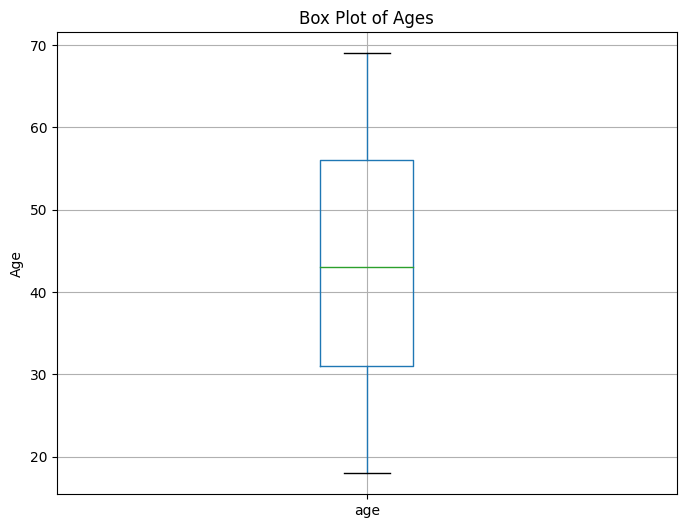

In [ ]:
#visualizing the age column

#showing the distribution of the ages using box plots
plt.figure(figsize=(8, 6))
df.boxplot(column='age')
plt.title('Box Plot of Ages')
plt.ylabel('Age')
plt.show()

The boxplot reveals a fairly even distribution of ages.

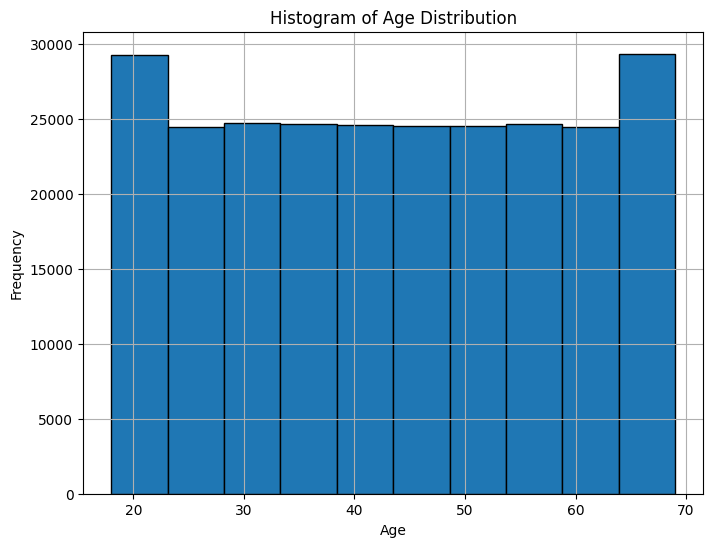

In [ ]:
# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.hist(df['age'], bins=10, edgecolor='black')  # Adjust bins as needed
plt.title('Histogram of Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# Calculating correlation coefficient between age and default columns.
correlation = df['age'].corr(df['default'])

print(f'Correlation coefficient between age and default: {correlation}')

Correlation coefficient between age and default: -0.16778316487134304


This negative correlation suggests that the older individuals in the dataset tend slightly less to default compared to younger individuals. However, the correlation is weak, meaning age alone does not strongly predict the default status.

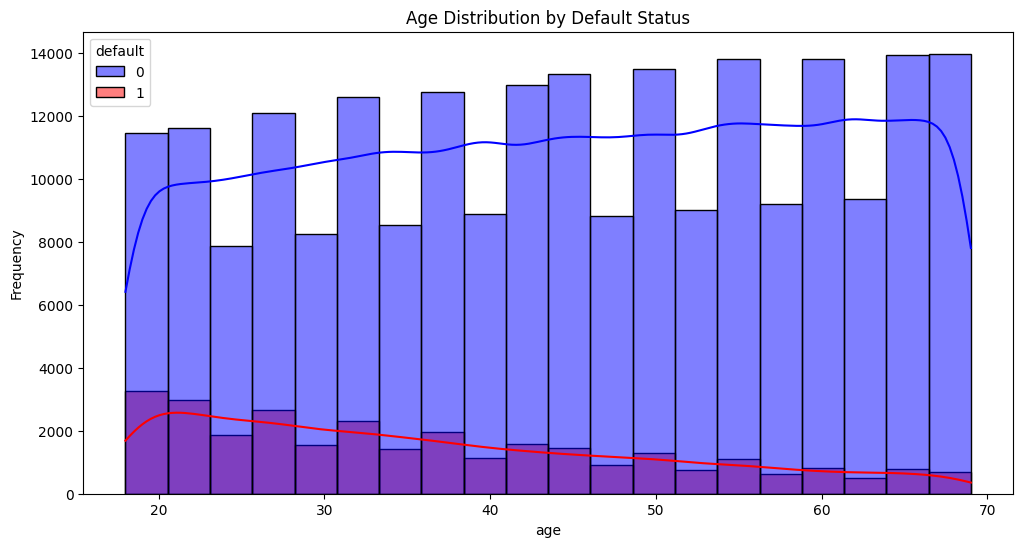

In [ ]:
# Plot histogram of age
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot histogram for age with color coding for Default
sns.histplot(data=df, bins=20, x='age', hue='default', palette=['blue', 'red'], alpha=0.5, kde=True)

# Add labels and title
plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Default Status')

# Display the plot
plt.show()

As we can see from the graph, younger people tend to default on their loans more than the older people.

####b. Income.

In [ ]:
# Descriptive analysis on the column
df['income'].describe()

count    255347.000000
mean      82499.304597
std       38963.013729
min       15000.000000
25%       48825.500000
50%       82466.000000
75%      116219.000000
max      149999.000000
Name: income, dtype: float64

The income of loan applicants ranges from a minimum of 15,000 to a maximum of 149,999, with an average income of 82,499.

In [ ]:
# Checking for outliers
# Define your criteria for identifying outliers
# For example, using the interquartile range (IQR) method
Q1 = df['income'].quantile(0.25)
Q3 = df['income'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
df[(df['income'] < (Q1 - 1.5 * IQR)) | (df['income'] > (Q3 + 1.5 * IQR))]

# Count the number of entries in the outliers section
df[(df['income'] < (Q1 - 1.5 * IQR)) | (df['income'] > (Q3 + 1.5 * IQR))].count().sum()

0

There are no outliers within the income column.

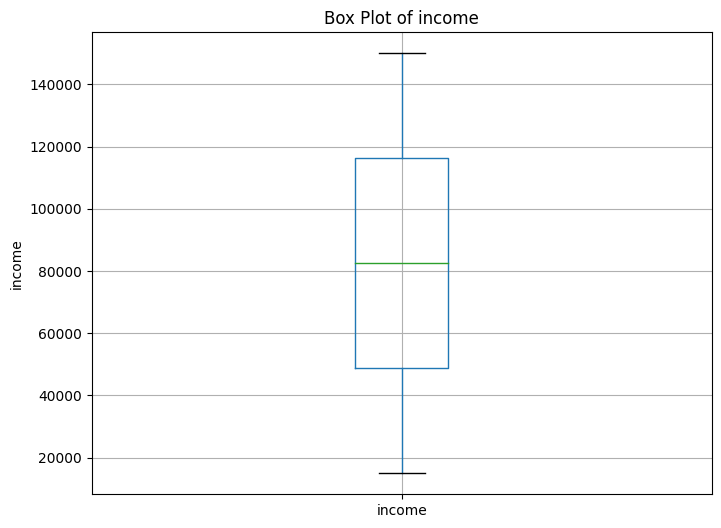

In [ ]:
#visualizing the income column
plt.figure(figsize=(8, 6))
df.boxplot(column='income')
plt.title('Box Plot of income')
plt.ylabel('income')
plt.show()

The boxplot reveals a fairly even distribution of income.

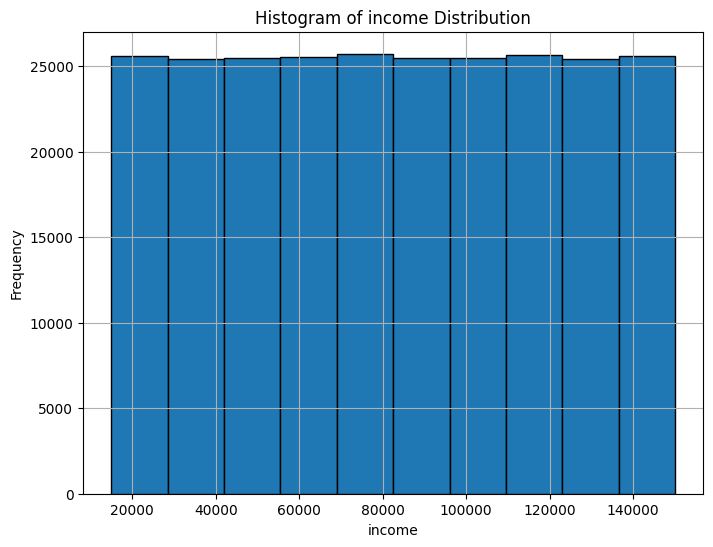

In [ ]:
# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.hist(df['income'], bins=10, edgecolor='black')  # Adjust bins as needed
plt.title('Histogram of income Distribution')
plt.xlabel('income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

As we can see from the histogram,income is evenly distributed in the dataset.

In [ ]:
# Calculating correlation coefficient between income and default columns.
correlation = df['income'].corr(df['default'])

print(f'Correlation coefficient between income and default: {correlation}')

Correlation coefficient between income and default: -0.09911948445660457


This negative correlation suggests that higher earning individuals in the dataset tend slightly less to default compared to low income earners. However, just like the age column, the correlation is weak, meaning income alone does not strongly predict the default status. This is also observed in the histogram below:

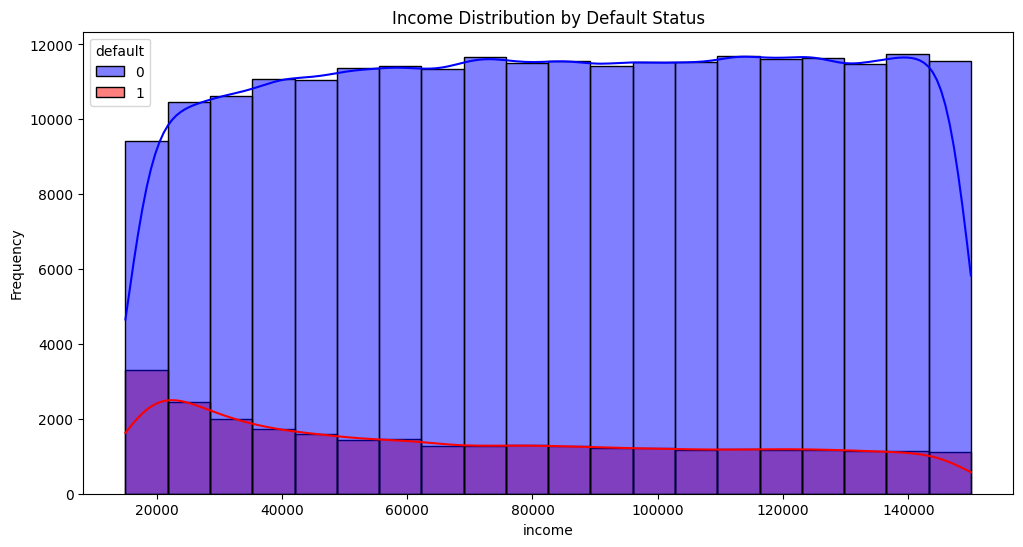

In [ ]:
# Plot histogram of income
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot histogram for income with color coding for Default
sns.histplot(data=df, bins=20, x='income', hue='default', palette=['blue', 'red'], alpha=0.5, kde=True)

# Add labels and title
plt.xlabel('income')
plt.ylabel('Frequency')
plt.title('Income Distribution by Default Status')

# Display the plot
plt.show()

In [ ]:
df.head(1)

,age,income,loanamount,creditscore,monthsemployed,numcreditlines,interestrate,loanterm,dtiratio,education,employmenttype,maritalstatus,hasmortgage,hasdependents,loanpurpose,hascosigner,default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0


####c. Loanamount

In [ ]:
# Descriptive analysis on the column
df['loanamount'].describe()

count    255347.000000
mean     127578.865512
std       70840.706142
min        5000.000000
25%       66156.000000
50%      127556.000000
75%      188985.000000
max      249999.000000
Name: loanamount, dtype: float64

The highest borrowed amount from the dataset is 249,999 while the least borrowed amount is 5,000. The mean borrowed amount is 127,578.

In [ ]:
# Checking for outliers
# Define your criteria for identifying outliers
# For example, using the interquartile range (IQR) method
Q1 = df['loanamount'].quantile(0.25)
Q3 = df['loanamount'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
df[(df['loanamount'] < (Q1 - 1.5 * IQR)) | (df['loanamount'] > (Q3 + 1.5 * IQR))]

# Count the number of entries in the outliers section
df[(df['loanamount'] < (Q1 - 1.5 * IQR)) | (df['loanamount'] > (Q3 + 1.5 * IQR))].count().sum()

0

There exists no outliers in the loanamount column. Meaning that amount of loan borrowed is evenly distributed in the dataset, there are no unique situations where someone overborrows beyond or below a the amount borrowed by most people in the population. This could be because of applicable loan limits by the loaning institution.

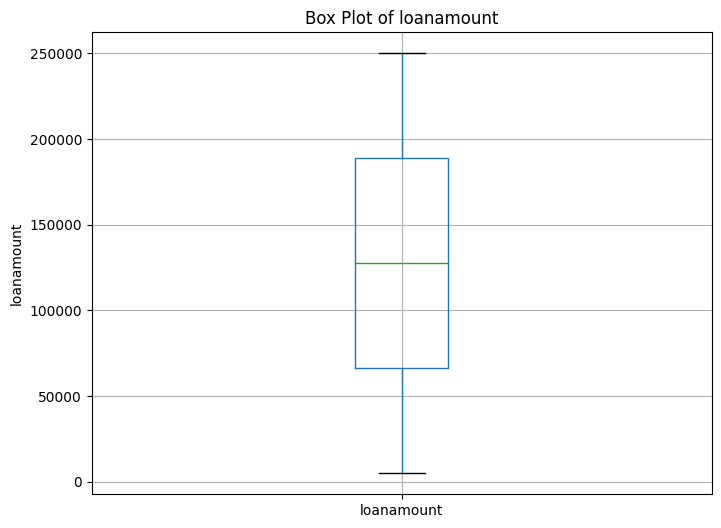

In [ ]:
#visualizing the loanamount column
plt.figure(figsize=(8, 6))
df.boxplot(column='loanamount')
plt.title('Box Plot of loanamount')
plt.ylabel('loanamount')
plt.show()

Once again, the histogram demonstrates that there are no outliers, as the minimum and maximum loan amounts are still within the range covered by the histogram's tails. The same is also observed in the histogram below:

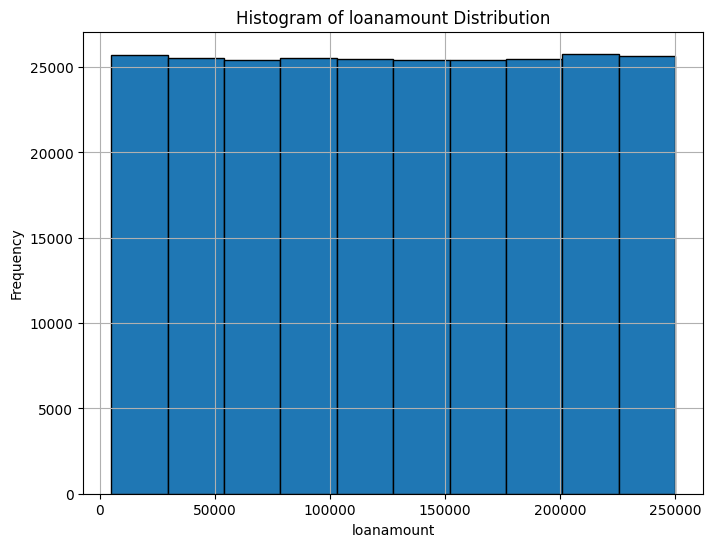

In [ ]:
# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.hist(df['loanamount'], bins=10, edgecolor='black')  # Adjust bins as needed
plt.title('Histogram of loanamount Distribution')
plt.xlabel('loanamount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

This indicates a nearly uniform distribution of loan amounts within the dataset.

In [ ]:
# Calculating correlation coefficient between loanamount and default columns.
correlation = df['loanamount'].corr(df['default'])

print(f'Correlation coefficient between loanamount and default: {correlation}')

Correlation coefficient between loanamount and default: 0.086659177237837


The weak positive correlation suggests that there may be a slight tendency for higher loan amounts to correlate with default status. This is also observed in the visualization below:

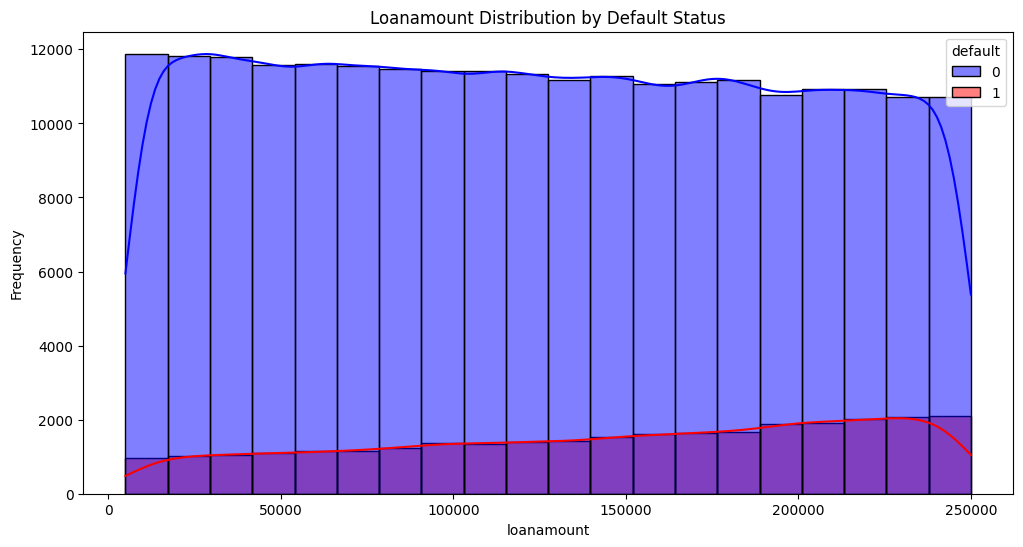

In [ ]:
# Plot histogram of loanamount
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot histogram for loanamount with color coding for Default
sns.histplot(data=df, bins=20, x='loanamount', hue='default', palette=['blue', 'red'], alpha=0.5, kde=True)

# Add labels and title
plt.xlabel('loanamount')
plt.ylabel('Frequency')
plt.title('Loanamount Distribution by Default Status')

# Display the plot
plt.show()

In [ ]:
df.head(1)

,age,income,loanamount,creditscore,monthsemployed,numcreditlines,interestrate,loanterm,dtiratio,education,employmenttype,maritalstatus,hasmortgage,hasdependents,loanpurpose,hascosigner,default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0


####d. creditscore

In [ ]:
# Descriptive analysis on the column
df['creditscore'].describe()

count    255347.000000
mean        574.264346
std         158.903867
min         300.000000
25%         437.000000
50%         574.000000
75%         712.000000
max         849.000000
Name: creditscore, dtype: float64

The credit scores in the dataset range from 300 to 849, with a mean credit score of 574.2643.

In [ ]:
# Checking for outliers
# Define your criteria for identifying outliers
# For example, using the interquartile range (IQR) method
Q1 = df['creditscore'].quantile(0.25)
Q3 = df['creditscore'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
df[(df['creditscore'] < (Q1 - 1.5 * IQR)) | (df['creditscore'] > (Q3 + 1.5 * IQR))]

# Count the number of entries in the outliers section
df[(df['creditscore'] < (Q1 - 1.5 * IQR)) | (df['creditscore'] > (Q3 + 1.5 * IQR))].count().sum()

0

There exists no outliers in the creditscore column meaning that the credit scores are evenly distributed within the dataset and that there are no extreme values.

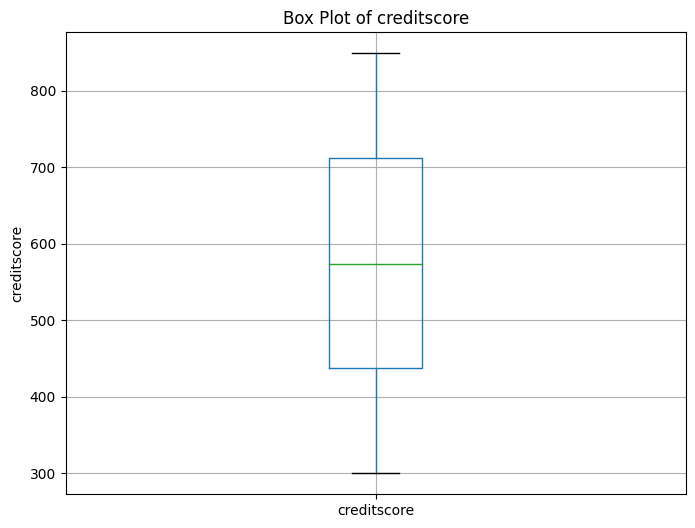

In [ ]:
#visualizing the creditscore column
plt.figure(figsize=(8, 6))
df.boxplot(column='creditscore')
plt.title('Box Plot of creditscore')
plt.ylabel('creditscore')
plt.show()

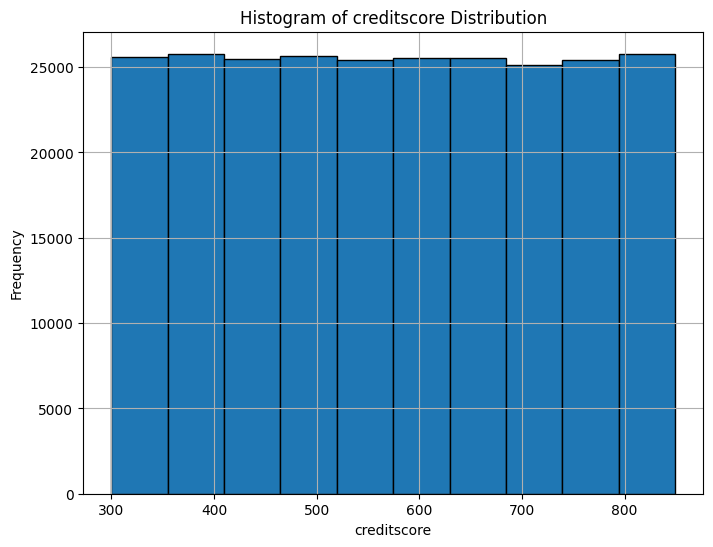

In [ ]:
# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.hist(df['creditscore'], bins=10, edgecolor='black')  # Adjust bins as needed
plt.title('Histogram of creditscore Distribution')
plt.xlabel('creditscore')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

This indicates a nearly uniform distribution of credit scores within the dataset.

In [ ]:
# Calculating correlation coefficient between creditscore and default columns.
correlation = df['creditscore'].corr(df['default'])

print(f'Correlation coefficient between creditscore and default: {correlation}')

Correlation coefficient between creditscore and default: -0.03416649376077087


The negative correlation coefficient suggests that individuals with higher credit scores may have a slightly lower likelihood of defaulting. However, the weak correlation implies that credit score alone does not strongly predict default status. This is also observed below:

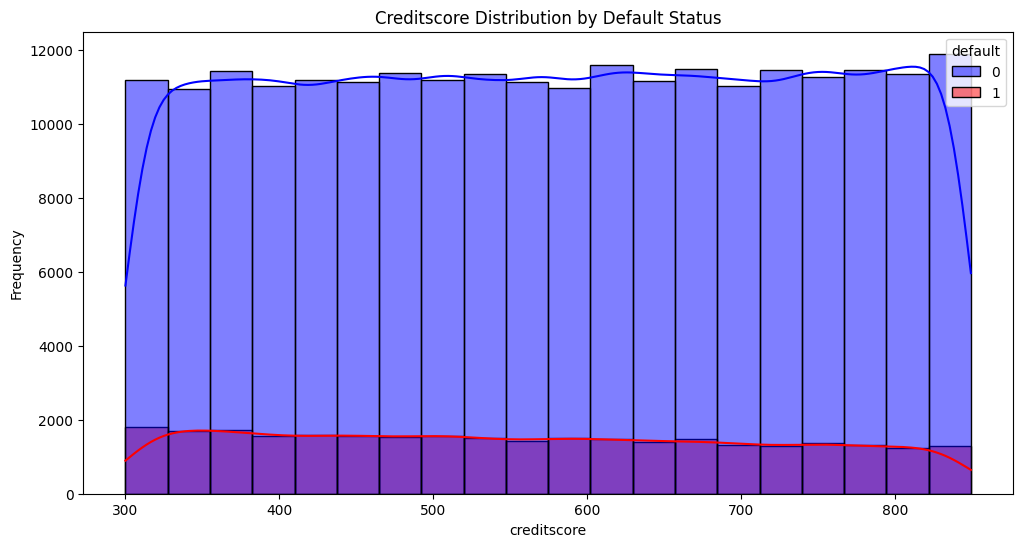

In [ ]:
# Plot histogram of creditscore
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot histogram for creditscore with color coding for Default
sns.histplot(data=df, bins=20, x='creditscore', hue='default', palette=['blue', 'red'], alpha=0.5, kde=True)

# Add labels and title
plt.xlabel('creditscore')
plt.ylabel('Frequency')
plt.title('Creditscore Distribution by Default Status')

# Display the plot
plt.show()

In [ ]:
df.head(1)

,age,income,loanamount,creditscore,monthsemployed,numcreditlines,interestrate,loanterm,dtiratio,education,employmenttype,maritalstatus,hasmortgage,hasdependents,loanpurpose,hascosigner,default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0


####e. Months Employed

In [ ]:
df['monthsemployed'].describe()

count    255347.000000
mean         59.541976
std          34.643376
min           0.000000
25%          30.000000
50%          60.000000
75%          90.000000
max         119.000000
Name: monthsemployed, dtype: float64

The dataset shows that loan applicants have employment histories ranging from 0 to 119 months. This spans from some applicants who have never been employed to others who have been employed for approximately 10 years.

In [ ]:
# Checking for outliers
# Define your criteria for identifying outliers
# For example, using the interquartile range (IQR) method
Q1 = df['monthsemployed'].quantile(0.25)
Q3 = df['monthsemployed'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
df[(df['monthsemployed'] < (Q1 - 1.5 * IQR)) | (df['monthsemployed'] > (Q3 + 1.5 * IQR))]

# Count the number of entries in the outliers section
df[(df['monthsemployed'] < (Q1 - 1.5 * IQR)) | (df['monthsemployed'] > (Q3 + 1.5 * IQR))].count().sum()

0

There are no outliers in the 'months employed' column, indicating a relatively even distribution of employment periods among loan applicants in the dataset. Let's visualize this below:

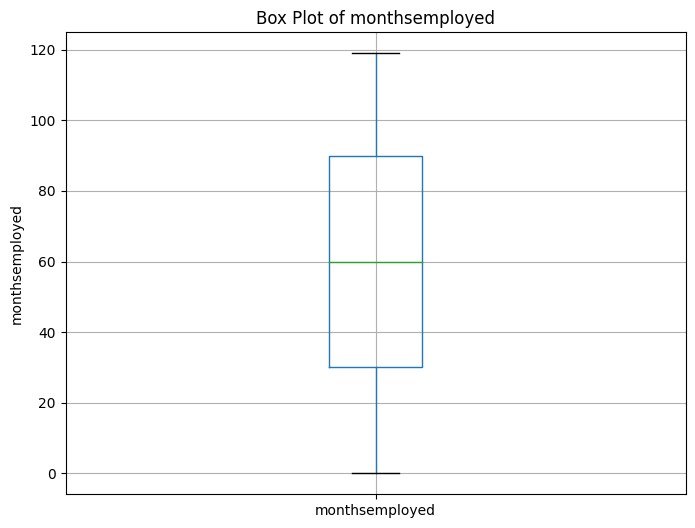

In [ ]:
#visualizing the monthsemployed column
plt.figure(figsize=(8, 6))
df.boxplot(column='monthsemployed')
plt.title('Box Plot of monthsemployed')
plt.ylabel('monthsemployed')
plt.show()

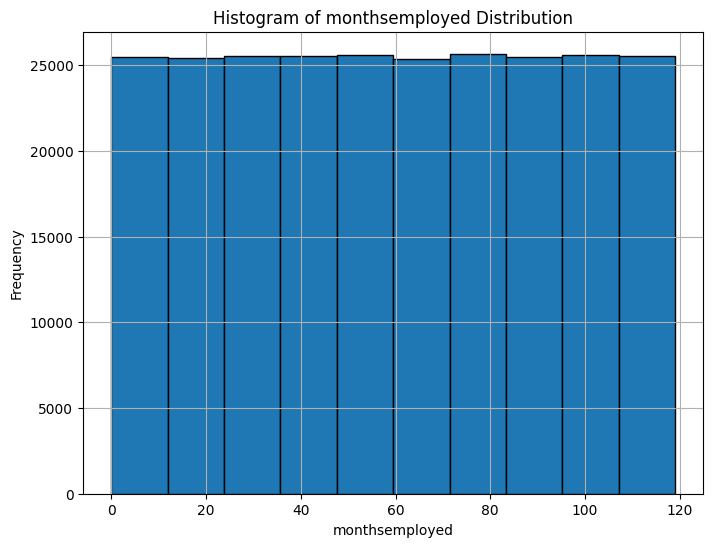

In [ ]:
# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.hist(df['monthsemployed'], bins=10, edgecolor='black')  # Adjust bins as needed
plt.title('Histogram of monthsemployed Distribution')
plt.xlabel('monthsemployed')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

As we can see, the employment periods is evenly distributed within the population.

In [ ]:
# Calculating correlation coefficient between monthsemployed and default columns.
correlation = df['monthsemployed'].corr(df['default'])

print(f'Correlation coefficient between monthsemployed and default: {correlation}')

Correlation coefficient between monthsemployed and default: -0.09737382897016933


The negative correlation coefficient suggests that individuals with longer employment periods may have a slightly lower likelihood of defaulting. However, the weak correlation implies that 'months employed' alone is not a strong predictor of default status. This observation is also depicted below:

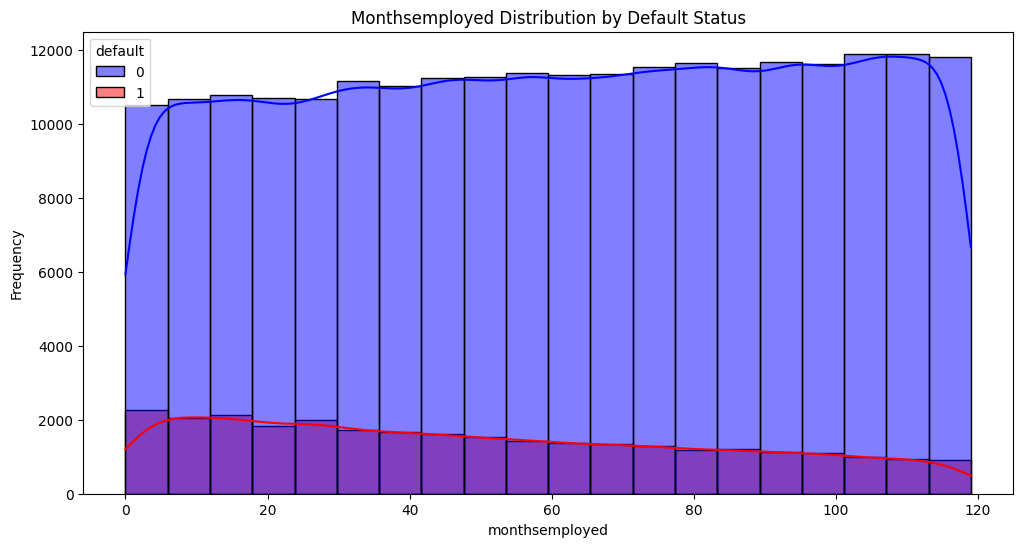

In [ ]:
# Plot histogram of monthsemployed
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot histogram for monthsemployed with color coding for Default
sns.histplot(data=df, bins=20, x='monthsemployed', hue='default', palette=['blue', 'red'], alpha=0.5, kde=True)

# Add labels and title
plt.xlabel('monthsemployed')
plt.ylabel('Frequency')
plt.title('Monthsemployed Distribution by Default Status')

# Display the plot
plt.show()

In [ ]:
df.head(1)

,age,income,loanamount,creditscore,monthsemployed,numcreditlines,interestrate,loanterm,dtiratio,education,employmenttype,maritalstatus,hasmortgage,hasdependents,loanpurpose,hascosigner,default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0


####f. numcreditlines

In [ ]:
df['numcreditlines'].describe()

count    255347.000000
mean          2.501036
std           1.117018
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           4.000000
Name: numcreditlines, dtype: float64

The least number of credit lines an individual has in the dataset is 1 while the most is 4. The mean number of credit lines is 2.

In [ ]:
# Checking for outliers
# Define your criteria for identifying outliers
# For example, using the interquartile range (IQR) method
Q1 = df['numcreditlines'].quantile(0.25)
Q3 = df['numcreditlines'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
df[(df['numcreditlines'] < (Q1 - 1.5 * IQR)) | (df['numcreditlines'] > (Q3 + 1.5 * IQR))]

# Count the number of entries in the outliers section
df[(df['numcreditlines'] < (Q1 - 1.5 * IQR)) | (df['numcreditlines'] > (Q3 + 1.5 * IQR))].count().sum()

0

In [ ]:
# Calculating correlation coefficient between numcreditlines and default columns.
correlation = df['numcreditlines'].corr(df['default'])

print(f'Correlation coefficient between numcreditlines and default: {correlation}')

Correlation coefficient between numcreditlines and default: 0.02832972180922865


The weak positive correlation suggests that there may be a slight tendency for more credit lines to correlate with default status.

In [ ]:
df.head(1)

,age,income,loanamount,creditscore,monthsemployed,numcreditlines,interestrate,loanterm,dtiratio,education,employmenttype,maritalstatus,hasmortgage,hasdependents,loanpurpose,hascosigner,default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0


####g. interestrate

In [ ]:
df['interestrate'].describe()

count    255347.000000
mean         13.492773
std           6.636443
min           2.000000
25%           7.770000
50%          13.460000
75%          19.250000
max          25.000000
Name: interestrate, dtype: float64

The minimum interest rate applied on the loans is 2% while the maximum is 25%. The mean interest rate is 13.4927%. Checking for outliers:

In [ ]:
# Checking for outliers
# Define your criteria for identifying outliers
# For example, using the interquartile range (IQR) method
Q1 = df['interestrate'].quantile(0.25)
Q3 = df['interestrate'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
df[(df['interestrate'] < (Q1 - 1.5 * IQR)) | (df['interestrate'] > (Q3 + 1.5 * IQR))]

# Count the number of entries in the outliers section
df[(df['interestrate'] < (Q1 - 1.5 * IQR)) | (df['interestrate'] > (Q3 + 1.5 * IQR))].count().sum()

0

There are no outliers in the 'interest rate' column, indicating a relatively uniform distribution of interest rates across the dataset. This consistency may be attributed to the even distribution of loan amounts within the dataset. Let's visualize this distribution:

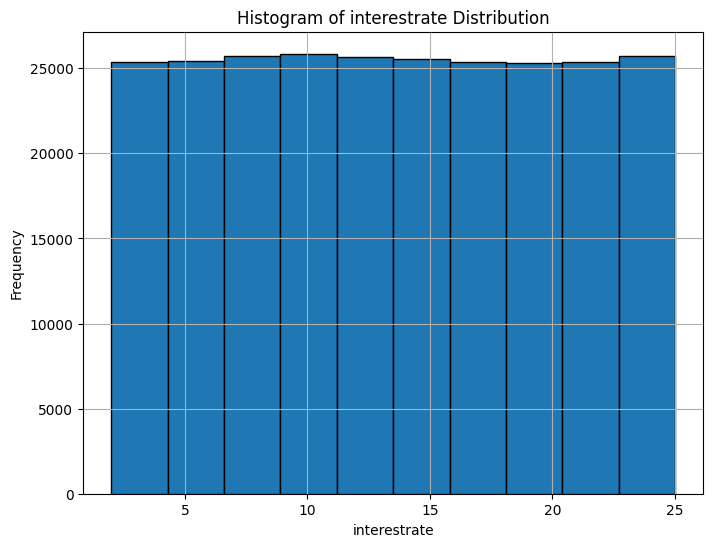

In [ ]:
# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.hist(df['interestrate'], bins=10, edgecolor='black')  # Adjust bins as needed
plt.title('Histogram of interestrate Distribution')
plt.xlabel('interestrate')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
# Calculating correlation coefficient between interestrate and loanamount columns.
correlation = df['interestrate'].corr(df['loanamount'])

print(f'Correlation coefficient between interestrate and loanamount: {correlation}')

Correlation coefficient between interestrate and loanamount: -0.002291119036466577


This goes to show that interest rates on loans tend to be slightly lower for higher loan amounts.

In [ ]:
# Calculating correlation coefficient between interestrate and default columns.
correlation = df['interestrate'].corr(df['default'])

print(f'Correlation coefficient between interestrate and default: {correlation}')

Correlation coefficient between interestrate and default: 0.1312730152798969


The weak positive correlation suggests that there may be a slight tendency for higher interest rates to correlate with default status. Let's visualize this below:

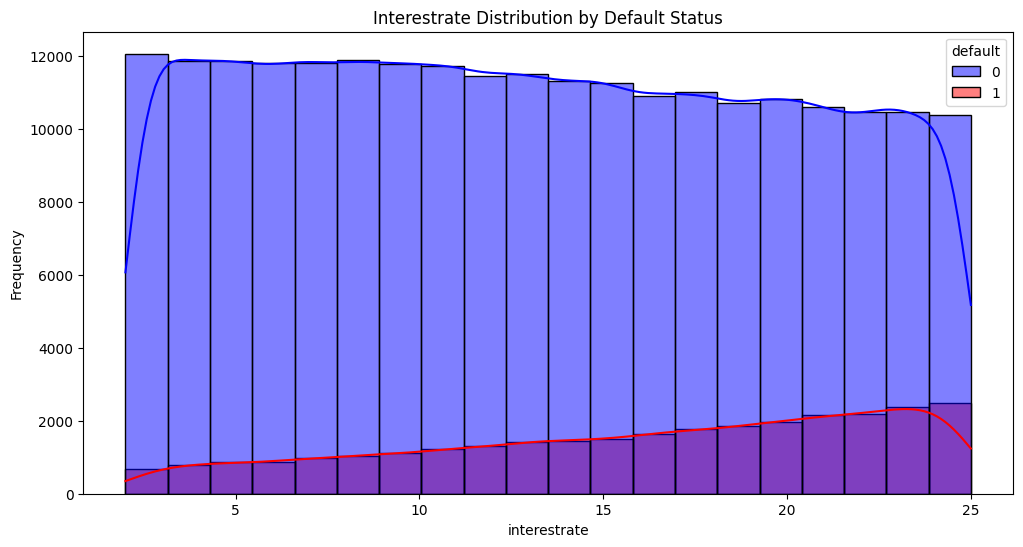

In [ ]:
# Plot histogram of interestrate
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot histogram for interestrate with color coding for Default
sns.histplot(data=df, bins=20, x='interestrate', hue='default', palette=['blue', 'red'], alpha=0.5, kde=True)

# Add labels and title
plt.xlabel('interestrate')
plt.ylabel('Frequency')
plt.title('Interestrate Distribution by Default Status')

# Display the plot
plt.show()

In [ ]:
df.head(1)

,age,income,loanamount,creditscore,monthsemployed,numcreditlines,interestrate,loanterm,dtiratio,education,employmenttype,maritalstatus,hasmortgage,hasdependents,loanpurpose,hascosigner,default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0


####h. loanterm

In [ ]:
df['loanterm'].describe()

count    255347.000000
mean         36.025894
std          16.969330
min          12.000000
25%          24.000000
50%          36.000000
75%          48.000000
max          60.000000
Name: loanterm, dtype: float64

Loan terms in the dataset range from 12 to 60 months, equivalent to 1 to 5 years. The mean loan term is approximately 36.03 months, or about 3 years.

In [ ]:
# Checking for outliers
# Define your criteria for identifying outliers
# For example, using the interquartile range (IQR) method
Q1 = df['loanterm'].quantile(0.25)
Q3 = df['loanterm'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
df[(df['loanterm'] < (Q1 - 1.5 * IQR)) | (df['loanterm'] > (Q3 + 1.5 * IQR))]

# Count the number of entries in the outliers section
df[(df['loanterm'] < (Q1 - 1.5 * IQR)) | (df['loanterm'] > (Q3 + 1.5 * IQR))].count().sum()

0

There are no outliers in this column meaning all loan terms are uniformly distributed in the population. Let's visualize this:

In [ ]:
#visualizing the loanterm column
plt.figure(figsize=(8, 6))
df.boxplot(column='loanterm')
plt.title('Box Plot of Loanterm')
plt.ylabel('loanterm')
plt.show()

In [ ]:
# Calculating correlation coefficient between loanterm and default columns.
correlation = df['loanterm'].corr(df['default'])

print(f'Correlation coefficient between loanterm and default: {correlation}')

Correlation coefficient between loanterm and default: 0.0005446976963164878


The weak positive correlation suggests that there may be a slight tendency for longer loanterm periods to correlate with default status.

In [ ]:
df.head(1)

,age,income,loanamount,creditscore,monthsemployed,numcreditlines,interestrate,loanterm,dtiratio,education,employmenttype,maritalstatus,hasmortgage,hasdependents,loanpurpose,hascosigner,default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0


####i. dtiratio

In [ ]:
df['dtiratio'].describe()

count    255347.000000
mean          0.500212
std           0.230917
min           0.100000
25%           0.300000
50%           0.500000
75%           0.700000
max           0.900000
Name: dtiratio, dtype: float64

dti ratio in the dataset range from 0.1 to 0.9 with the mean dti ratio being 0.5002.

In [ ]:
# Checking for outliers
# Define your criteria for identifying outliers
# For example, using the interquartile range (IQR) method
Q1 = df['dtiratio'].quantile(0.25)
Q3 = df['dtiratio'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
df[(df['dtiratio'] < (Q1 - 1.5 * IQR)) | (df['dtiratio'] > (Q3 + 1.5 * IQR))]

# Count the number of entries in the outliers section
df[(df['dtiratio'] < (Q1 - 1.5 * IQR)) | (df['dtiratio'] > (Q3 + 1.5 * IQR))].count().sum()

0

This suggests that the dti ratios are evenly distributed within the dataset.

In [ ]:
# Calculating correlation coefficient between dtiratio and default columns.
correlation = df['dtiratio'].corr(df['default'])

print(f'Correlation coefficient between dtiratio and default: {correlation}')

Correlation coefficient between dtiratio and default: 0.019235981039708045


The weak positive correlation suggests that there may be a slight tendency for higher dti ratios to correlate with default status.

In [ ]:
df.head(1)

,age,income,loanamount,creditscore,monthsemployed,numcreditlines,interestrate,loanterm,dtiratio,education,employmenttype,maritalstatus,hasmortgage,hasdependents,loanpurpose,hascosigner,default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0


####j. default

In [8]:
defaulters = df[df['default'] == 1]
non_defaulters = df[df['default'] == 0]

print(f'Number of defaulters: {len(defaulters)}')
print(f'Number of non-defaulters: {len(non_defaulters)}')

Number of defaulters: 29653
Number of non-defaulters: 225694


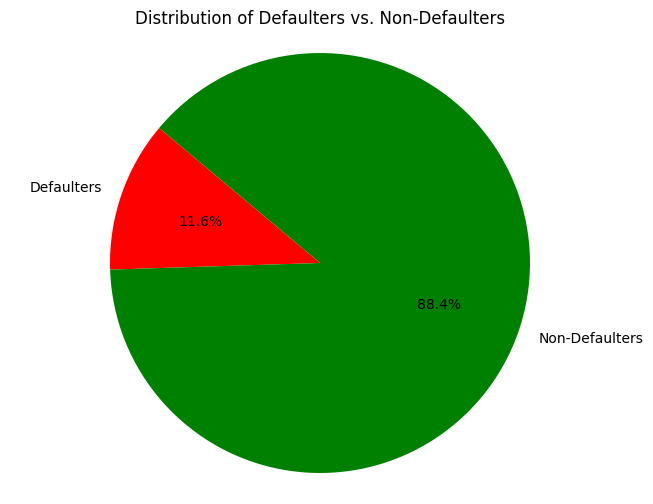

In [9]:
# Assuming you have already calculated the lengths
defaulters_count = len(defaulters)
non_defaulters_count = len(non_defaulters)

# Data for the pie chart
sizes = [defaulters_count, non_defaulters_count]
labels = ['Defaulters', 'Non-Defaulters']
colors = ['red', 'green']  # Color for defaulters and non-defaulters

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Defaulters vs. Non-Defaulters')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In the dataset, there are 29,653 defaulters, comprising 11.6% of the total, and 225,694 non-defaulters, accounting for 88.4% of the total. This distribution could introduce bias in the trained model, potentially favoring the identification of non-defaulters over defaulters.

#### EDA on Cateogorical Variables.

Since we have completed the analysis on the quantitative variables, let's also analyze the categorical variables.

In [ ]:
# Identifying categorical variables
cat_columns = ['education', 'employmenttype', 'maritalstatus', 'hasmortgage','hasdependents','loanpurpose', 'hascosigner']

In [ ]:
#creating a contingency table to show distribution of variables in cat_columns with the 'default' column
for column in cat_columns:
  contingency_table = pd.crosstab(df['default'], df[column])
  print(f'Contingency table for {column} and default:')
  print(contingency_table)
  print('\n')

Contingency table for education and default:
education  Bachelor's  High School  Master's    PhD
default                                            
0               56577        55673     56633  56811
1                7789         8230      6908   6726


Contingency table for employmenttype and default:
employmenttype  Full-time  Part-time  Self-employed  Unemployed
default                                                        
0                   57632      56484          56404       55174
1                    6024       7677           7302        8650


Contingency table for maritalstatus and default:
maritalstatus  Divorced  Married  Single
default                                 
0                 74376    76433   74885
1                 10657     8869   10127


Contingency table for hasmortgage and default:
hasmortgage      No     Yes
default                    
0            111909  113785
1             15761   13892


Contingency table for hasdependents and default:
hasdependent

**Contingency Table Analysis of Categorical Columns and Default Status:**

This contingency table illustrates the distribution of default status across various categorical columns. From the analysis, we derive the following insights regarding each category:

1. **Education:** Individuals with higher education levels exhibit lower default rates. High school graduates tend to default more frequently.

2. **Employment Type:** Unemployed individuals are more likely to default on loan payments. Full-time employees show a lower default rate compared to self-employed individuals.

3. **Marital Status:** Married individuals present a lower risk of default compared to unmarried individuals.

4. **Has Mortgage:** Applicants with mortgages demonstrate a lower probability of default compared to those without.

5. **Has Dependents:** Individuals with dependents are less likely to default on loans than those without.

6. **Loan Purpose:** Borrowers taking loans for business purposes exhibit a higher likelihood of default. Conversely, borrowers using loans for home purchase or maintenance (mortgage) display the lowest default rates.

7. **Has Cosigner:** Applicants with cosigners present a lower default risk compared to those without.

**Overall Conclusion:**
From the dataset analysis, it is evident that individuals who are full-time employed, highly educated, and have responsibilities such as dependents and mortgages are less likely to default on loans.


In [ ]:
#chi-square test of independence
import scipy.stats as stats

for column in cat_columns:
  contingency_table= pd.crosstab(df['default'], df[column])
  chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
  print(f'Chi-square test for {column} and default:')
  print(f'Chi2 statistic: {chi2}, P-value {p}')
  print('\n')

Chi-square test for education and default:
Chi2 statistic: 214.01898255592707, P-value 3.9404864175508156e-46


Chi-square test for employmenttype and default:
Chi2 statistic: 529.7449284156027, P-value 1.7066378020433154e-114


Chi-square test for maritalstatus and default:
Chi2 statistic: 200.36113560654888, P-value 3.105504830442399e-44


Chi-square test for hasmortgage and default:
Chi2 statistic: 133.25200560751574, P-value 7.963383224552868e-31


Chi-square test for hasdependents and default:
Chi2 statistic: 306.8506093007918, P-value 1.0600086119645882e-68


Chi-square test for loanpurpose and default:
Chi2 statistic: 127.93422475687699, P-value 1.0767865809403042e-26


Chi-square test for hascosigner and default:
Chi2 statistic: 390.3050463714834, P-value 7.103434211754059e-87




The small p-values indicate that there is a significant association between the columns and the target column, 'default'.
The large Chi-square statistics further support that the observed differences in frequencies are substantial and unlikely to be due to chance.

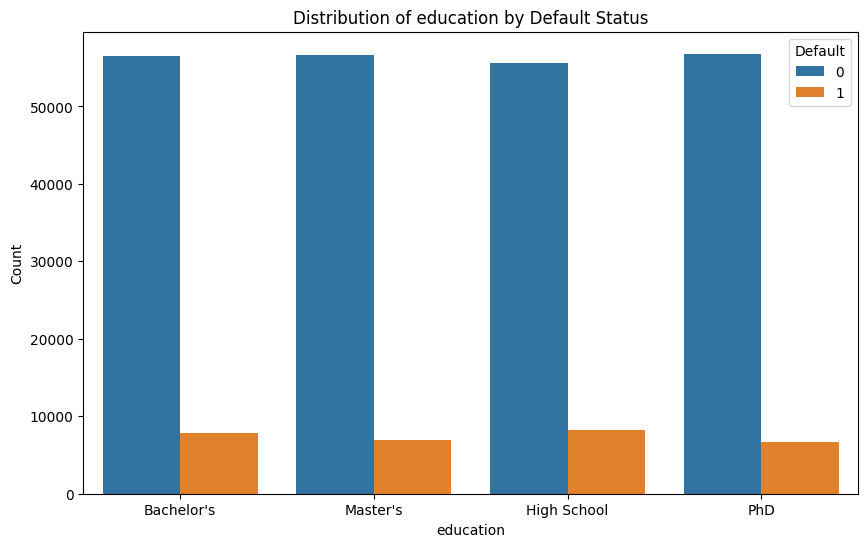

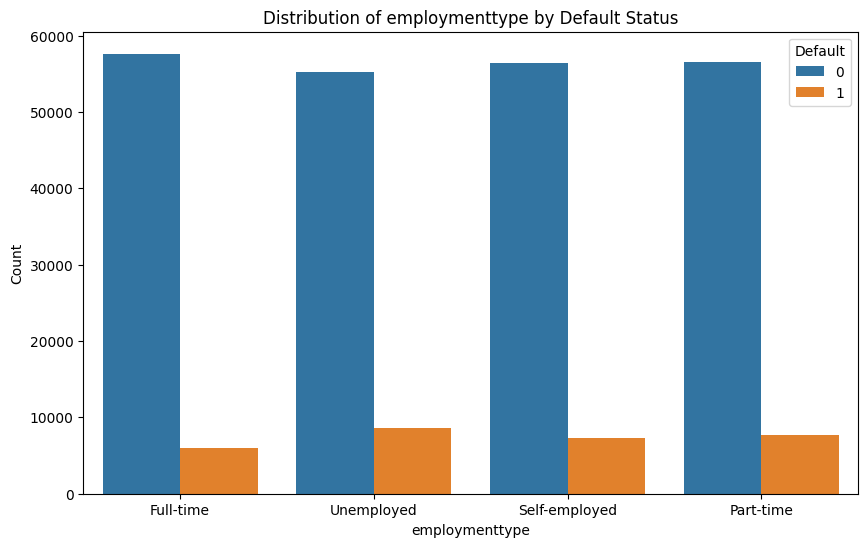

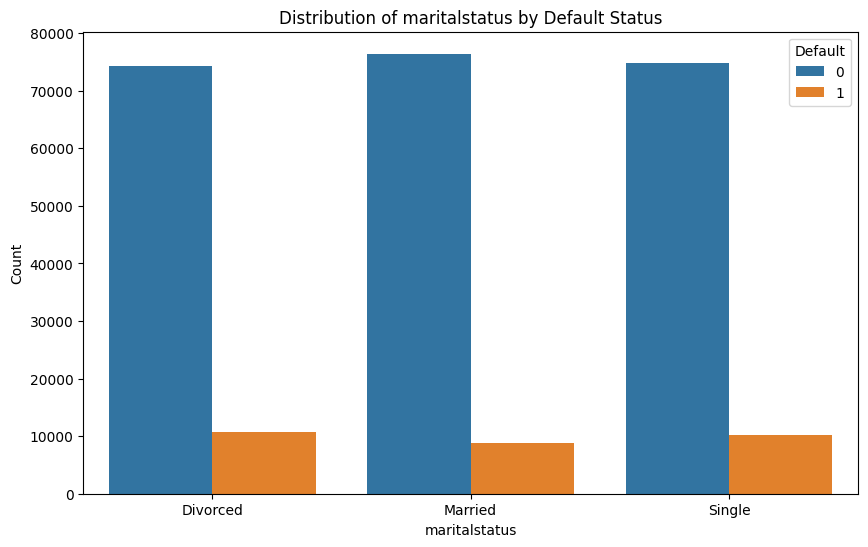

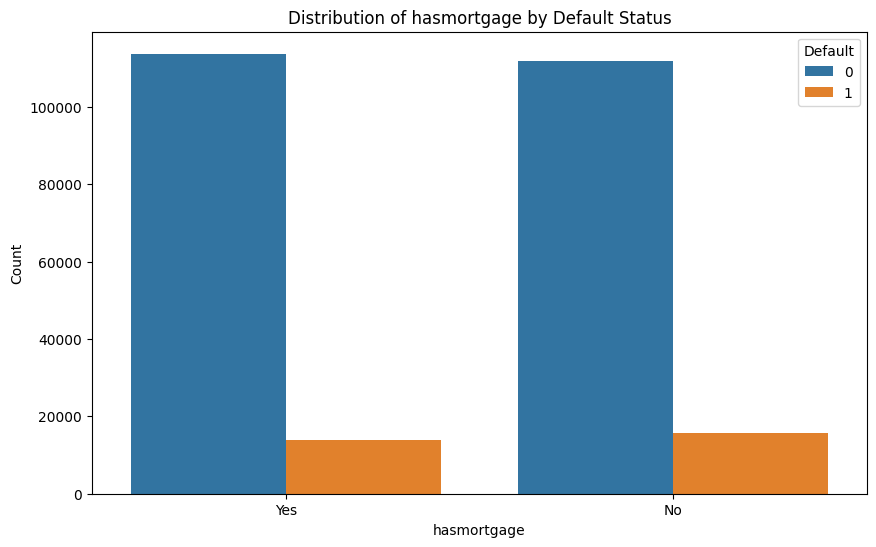

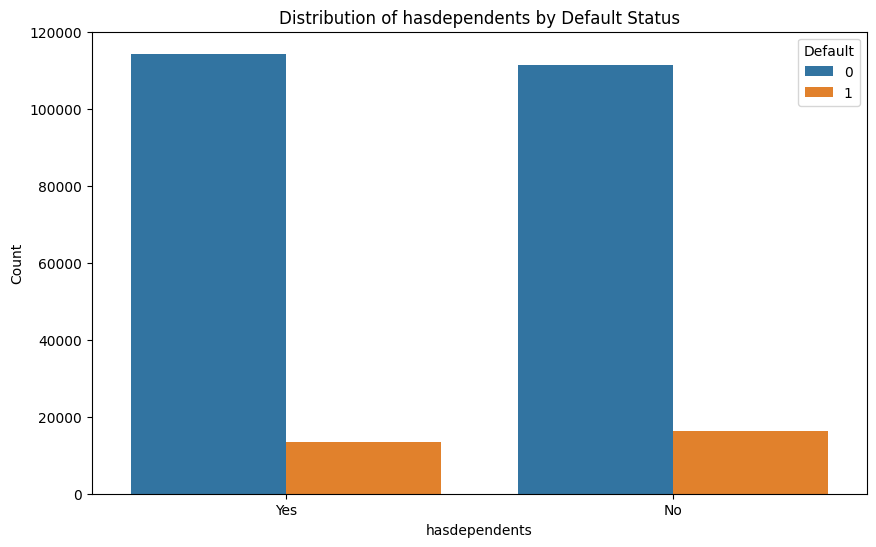

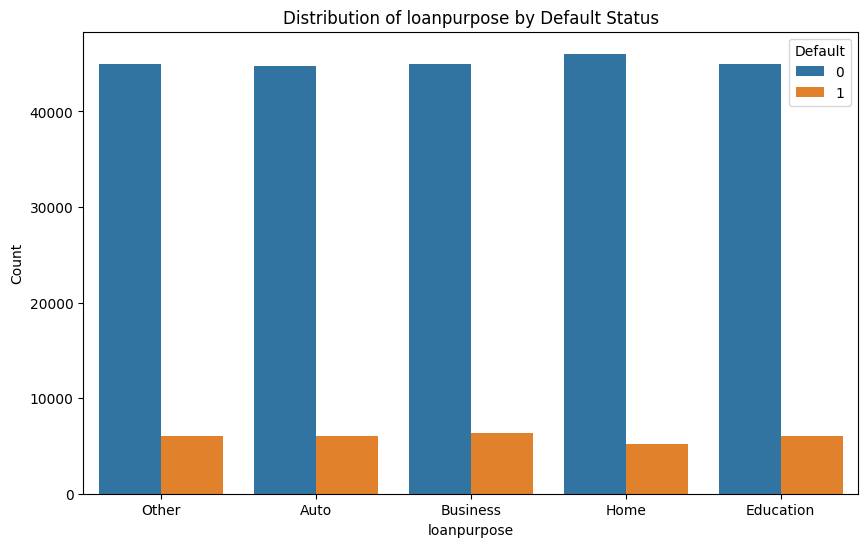

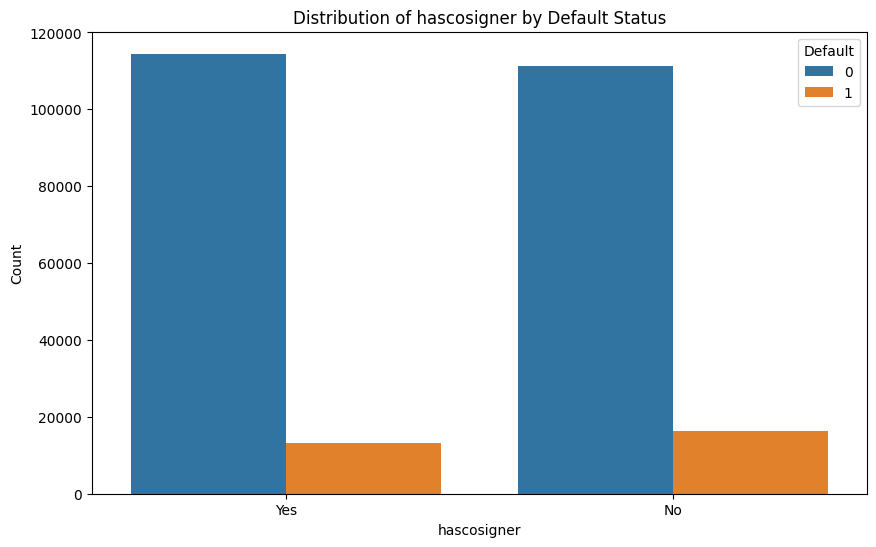

In [ ]:
#visualization
for column in cat_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column, hue='default')
    plt.title(f"Distribution of {column} by Default Status")
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Default')
    plt.show()

#####Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding
for col in cat_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Display encoded DataFrame
print(df)

        age  income  loanamount  creditscore  monthsemployed  numcreditlines  \
0        56   85994       50587          520              80               4   
1        69   50432      124440          458              15               1   
2        46   84208      129188          451              26               3   
3        32   31713       44799          743               0               3   
4        60   20437        9139          633               8               4   
...     ...     ...         ...          ...             ...             ...   
255342   19   37979      210682          541             109               4   
255343   32   51953      189899          511              14               2   
255344   56   84820      208294          597              70               3   
255345   42   85109       60575          809              40               1   
255346   62   22418       18481          636             113               2   

        interestrate  loanterm  dtirati

In [ ]:
# Calculate correlation with default column
correlations = df.corr()['default'].sort_values(ascending=False)

print(correlations)

default           1.000000
interestrate      0.131273
loanamount        0.086659
employmenttype    0.041010
numcreditlines    0.028330
dtiratio          0.019236
loanterm          0.000545
maritalstatus    -0.007902
loanpurpose      -0.010096
education        -0.022835
hasmortgage      -0.022856
creditscore      -0.034166
hasdependents    -0.034678
hascosigner      -0.039109
monthsemployed   -0.097374
income           -0.099119
age              -0.167783
Name: default, dtype: float64


###2. Feature Engineering.

####'totalpayment' column

Create the totalpayment column which is the product of loanamount, interestrate and loanterm.

In [6]:
# Calculate total_payment
df['totalpayment'] = df['loanamount'] * df['interestrate'] * df['loanterm']/12

# Find index of 'loanamount' column
loanamount_index = df.columns.get_loc('loanamount')

# Insert 'totalpayment' column after 'loanamount'
df.insert(loanamount_index + 1, 'totalpayment', df.pop('totalpayment'))

df.head()

,age,income,loanamount,totalpayment,creditscore,monthsemployed,numcreditlines,interestrate,loanterm,dtiratio,education,employmenttype,maritalstatus,hasmortgage,hasdependents,loanpurpose,hascosigner,default
0,56,85994,50587,2311320.03,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,2992782.00,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,5469819.92,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,633457.86,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,237979.56,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [ ]:
# Checking for outliers
# Define your criteria for identifying outliers
# For example, using the interquartile range (IQR) method
Q1 = df['totalpayment'].quantile(0.25)
Q3 = df['totalpayment'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
df[(df['totalpayment'] < (Q1 - 1.5 * IQR)) | (df['totalpayment'] > (Q3 + 1.5 * IQR))]

# Count the number of entries in the outliers section
df[(df['totalpayment'] < (Q1 - 1.5 * IQR)) | (df['totalpayment'] > (Q3 + 1.5 * IQR))].count().sum()

231912

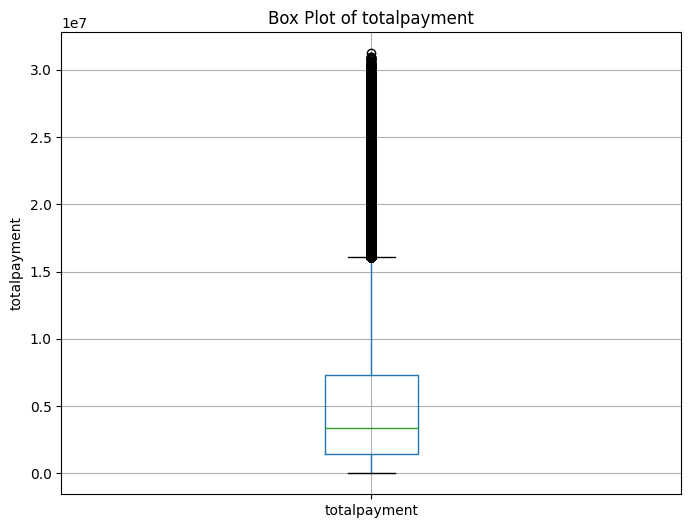

In [ ]:
#visualizing the totalpayment column
plt.figure(figsize=(8, 6))
df.boxplot(column='totalpayment')
plt.title('Box Plot of totalpayment')
plt.ylabel('totalpayment')
plt.show()

In [ ]:
# Calculating correlation coefficient between totalpayment and default columns.
correlation = df['totalpayment'].corr(df['default'])

print(f'Correlation coefficient between totalpayment and default: {correlation}')

Correlation coefficient between totalpayment and default: 0.11937100546422792


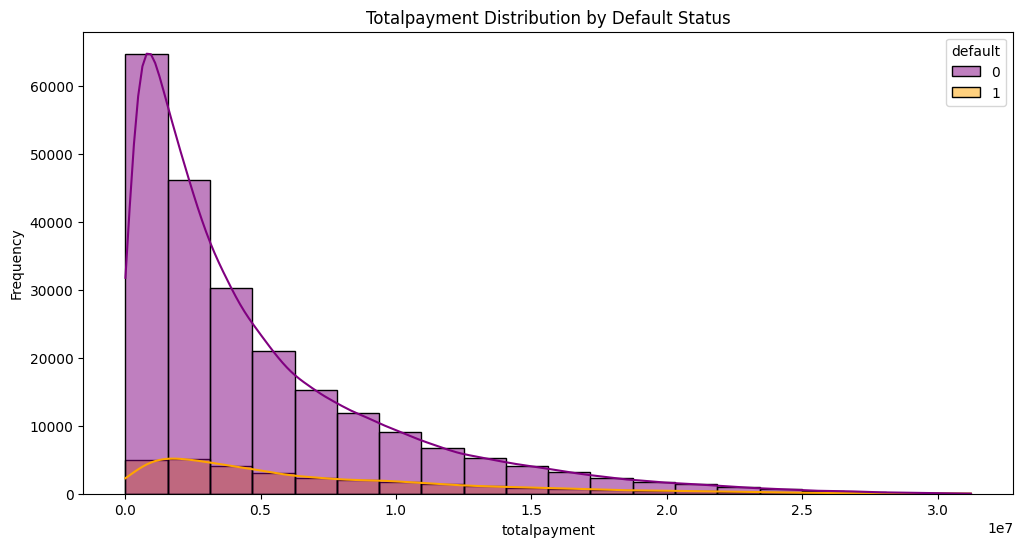

In [ ]:
# Plot histogram of totalpayment
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot histogram for totalpayment with color coding for Default
sns.histplot(data=df, bins=20, x='totalpayment', hue='default', palette=['purple', 'orange'], alpha=0.5, kde=True)

# Add labels and title
plt.xlabel('totalpayment')
plt.ylabel('Frequency')
plt.title('Totalpayment Distribution by Default Status')

# Display the plot
plt.show()

Considering the significance of the 'totalpayment' column and its impact on our analysis, we have decided to retain the outliers in this dataset. This approach ensures that we capture the complete range of variability in payment amounts, which is critical for accurately reflecting the underlying financial dynamics.

###Multivariate Analysis

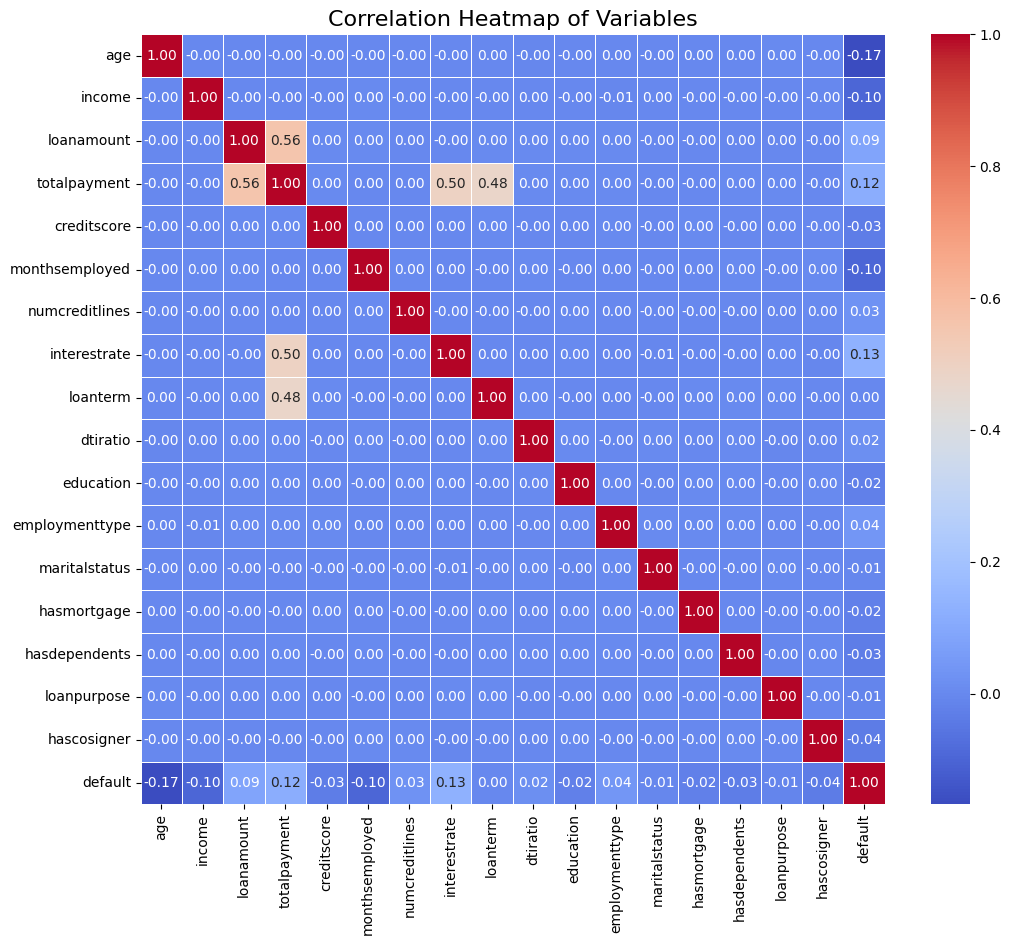

In [ ]:
# Calculate the correlation matrix
corr = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title
plt.title('Correlation Heatmap of Variables', fontsize=16)

# Show plot
plt.show()

The analysis indicates that initially, there were no correlations observed among the columns in the dataframe, except for their correlations with the 'default' column. However, there is notable correlation observed between the newly introduced 'totalpayment' column and its constituent columns—'loanamount' at 0.56, 'interestrate' at 0.50, and 'loanterm' at 0.48.

### Automatic EDA using [AutoViz](https://github.com/AutoViML/AutoViz)

In [7]:
!pip install -q feature_engine autoviz dataprep 2>/dev/null
!pip install autoviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.1/357.1 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 69.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 76.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 75.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.4/155.4 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 57.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 91.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 73.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Initialize AutoViz_Class instance
AV = AutoViz_Class()

# Specify your data and target variable
filename = ""  # Specify if you have a filename
target_variable = 'default'  # Assuming this is your target variable

# Generate visualizations without saving
# Set chart_format to an empty string if you don't want to save
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar=target_variable,
    dfte=df,
    header=0,
    verbose=1,
    lowess=False,
    chart_format='',  # Set to empty string instead of None
    max_rows_analyzed=min(df.shape[0], 1000),  # Limit rows for analysis
    max_cols_analyzed=min(df.shape[1], 50)   # Limit columns for analysis
)

    Since nrows is smaller than dataset, loading random sample of 1000 rows into pandas...
Shape of your Data Set loaded: (1000, 18)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  10
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  3
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    17 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        Lis

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
age,int64,0.000000,5,18.000000,69.000000,No issue
loanamount,int64,0.000000,99,5012.000000,249550.000000,No issue
totalpayment,float64,0.000000,NA,26857.000000,29766217.050000,Column has 48 outliers greater than upper bound (15619182.70) or lower than lower bound(-7090074.68). Cap them or remove them.
creditscore,int64,0.000000,45,300.000000,849.000000,No issue
monthsemployed,int64,0.000000,12,0.000000,119.000000,No issue
numcreditlines,int64,0.000000,0,1.000000,4.000000,No issue
interestrate,float64,0.000000,NA,2.010000,25.000000,No issue
loanterm,int64,0.000000,0,12.000000,60.000000,No issue
dtiratio,float64,0.000000,NA,0.100000,0.900000,No issue
education,int64,0.000000,0,0.000000,3.000000,No issue


Total Number of Scatter Plots = 6
All Plots done
Time to run AutoViz = 17 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


    Since nrows is smaller than dataset, loading random sample of 1000 rows into pandas...
Shape of your Data Set loaded: (1000, 18)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  10
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  3
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    17 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        Lis

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
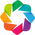

Saving scatterplots in HTML format
  0%|          | 0/3 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:00<00:00,  7.22it/s]

 67%|██████▋   | 2/3 [00:00<00:00,  7.42it/s]

Saving pair_scatters in HTML format


Saving distplots_cats in HTML format


Saving distplots_nums in HTML format


KDE plot is erroring due to problems with DynamicMaps. Hence it is skipped


Saving violinplots in HTML format


No date vars could be found in data set


Saving heatmaps in HTML format


Saving cat_var_plots in HTML format
                                               

Time to run AutoViz (in seconds) = 37
Process Complete


In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
from pathlib import Path
import shutil

# Ensure 'df' is defined and target variable exists
target_variable = 'default'
if target_variable not in df.columns:
    raise ValueError(f"Target variable '{target_variable}' not found in the dataset. Please check the column name.")

# Initialize AutoViz_Class instance
AV = AutoViz_Class()

# Define the directory to save plots
custom_plot_dir = "custom_plot_directory"
save_plot_path = '/content/drive/MyDrive/loan_default_pred_model/plots'

# Generate visualizations
dft = AV.AutoViz(
    filename="",
    sep=",",
    depVar=target_variable,
    dfte=df,
    header=0,
    verbose=1,
    lowess=False,
    chart_format="html",
    max_rows_analyzed=min([df.shape[0], 1000]),
    max_cols_analyzed=min([df.shape[1], 50]),
    save_plot_dir=custom_plot_dir
)

# Move the files to your Google Drive using shutil.move
plot_files = list(Path(f'/content/{custom_plot_dir}/{target_variable}/').glob('*.html'))
for file in plot_files:
    shutil.move(str(file), Path(save_plot_path) / file.name)  # Use shutil.move for cross-filesystem moves

print('Process Complete')

In [8]:
# Convert HTML to Images using Selenium- install necessary packages
!pip install selenium webdriver-manager
!apt-get update
!apt-get install -y chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

import os
os.environ['PATH'] += ':/usr/bin/chromedriver'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.7/467.7 kB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.2 MB/s eta 0:00:00
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [970 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 http://security.ubun

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options

# Set up the Chrome options and driver
chrome_options = Options()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument('--start-maximized')
chrome_options.add_argument('--window-size=1920,1080')

driver = webdriver.Chrome(options=chrome_options)

# Convert HTML files to PNG images
for file in Path(save_plot_path).glob('*.html'):
    driver.get(f"file://{file.resolve()}")
    screenshot_path = str(file.with_suffix('.png'))
    driver.save_screenshot(screenshot_path)

driver.quit()

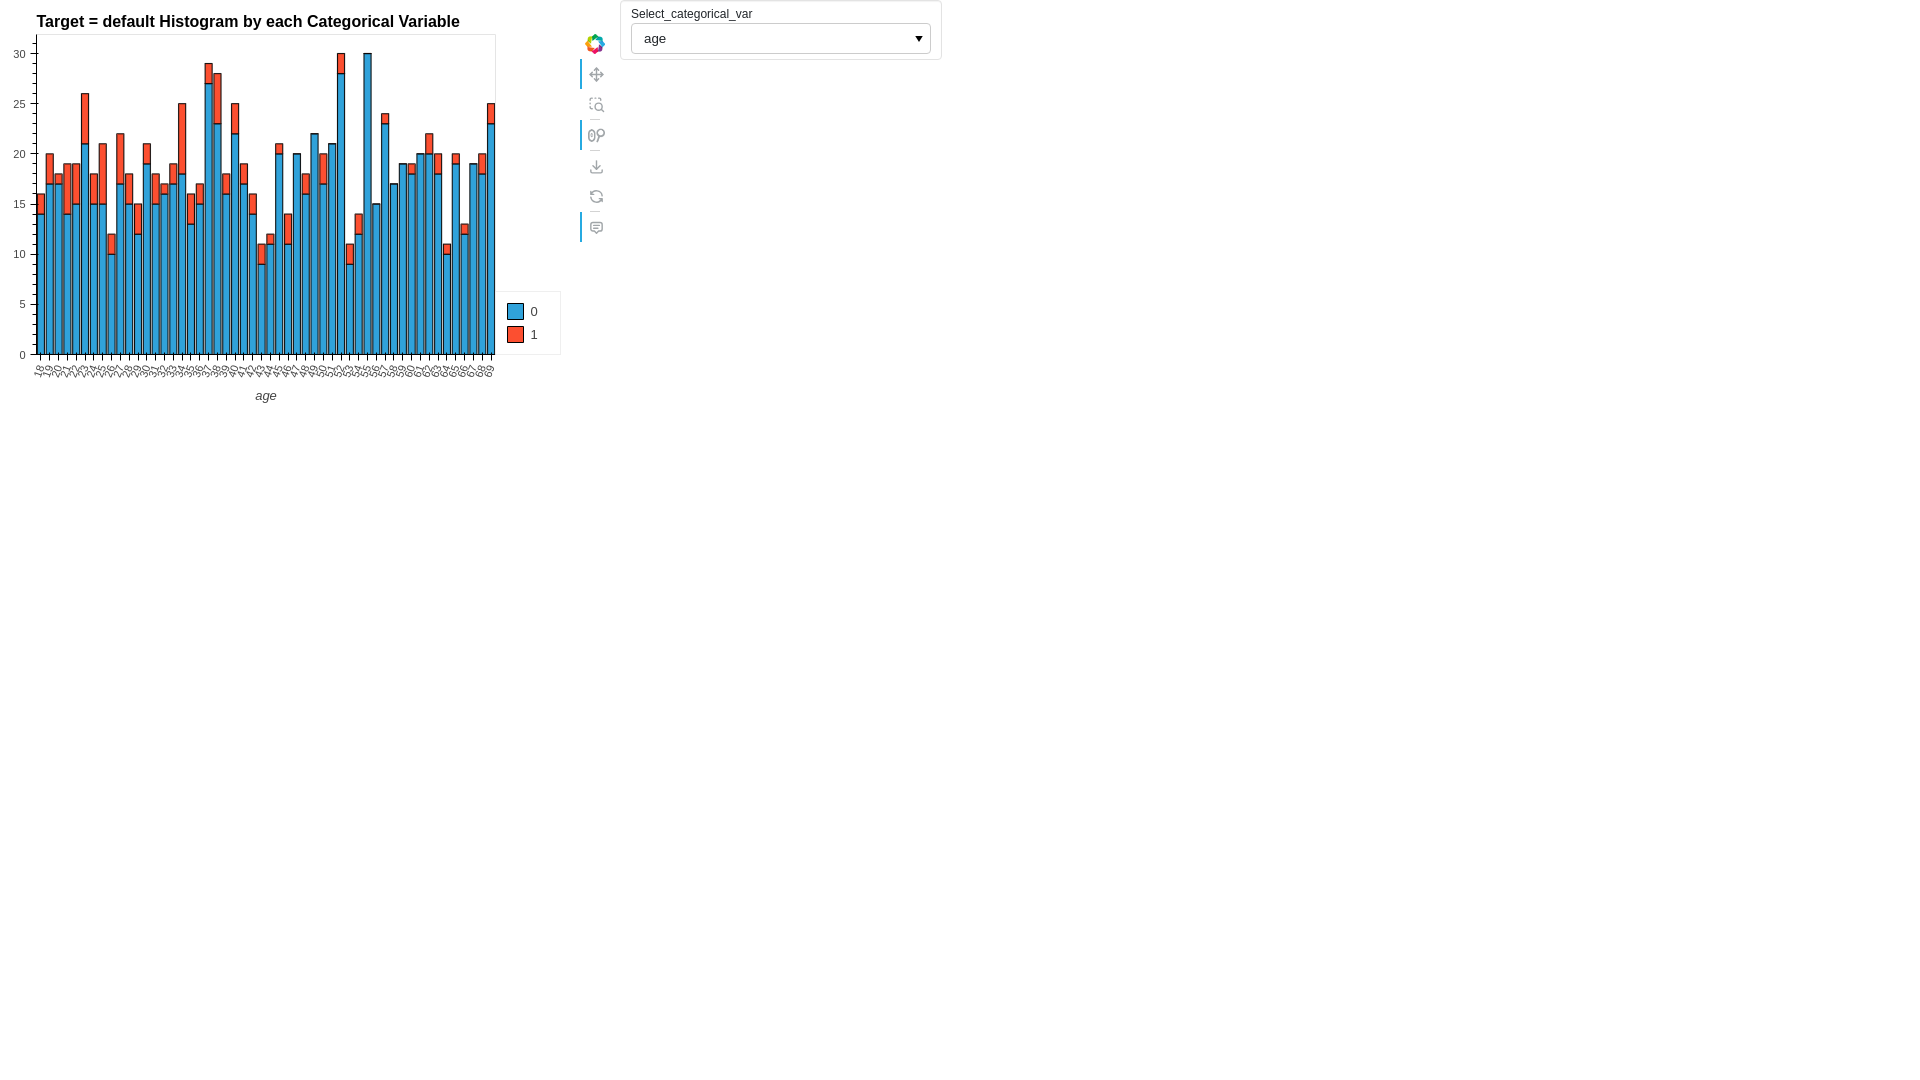

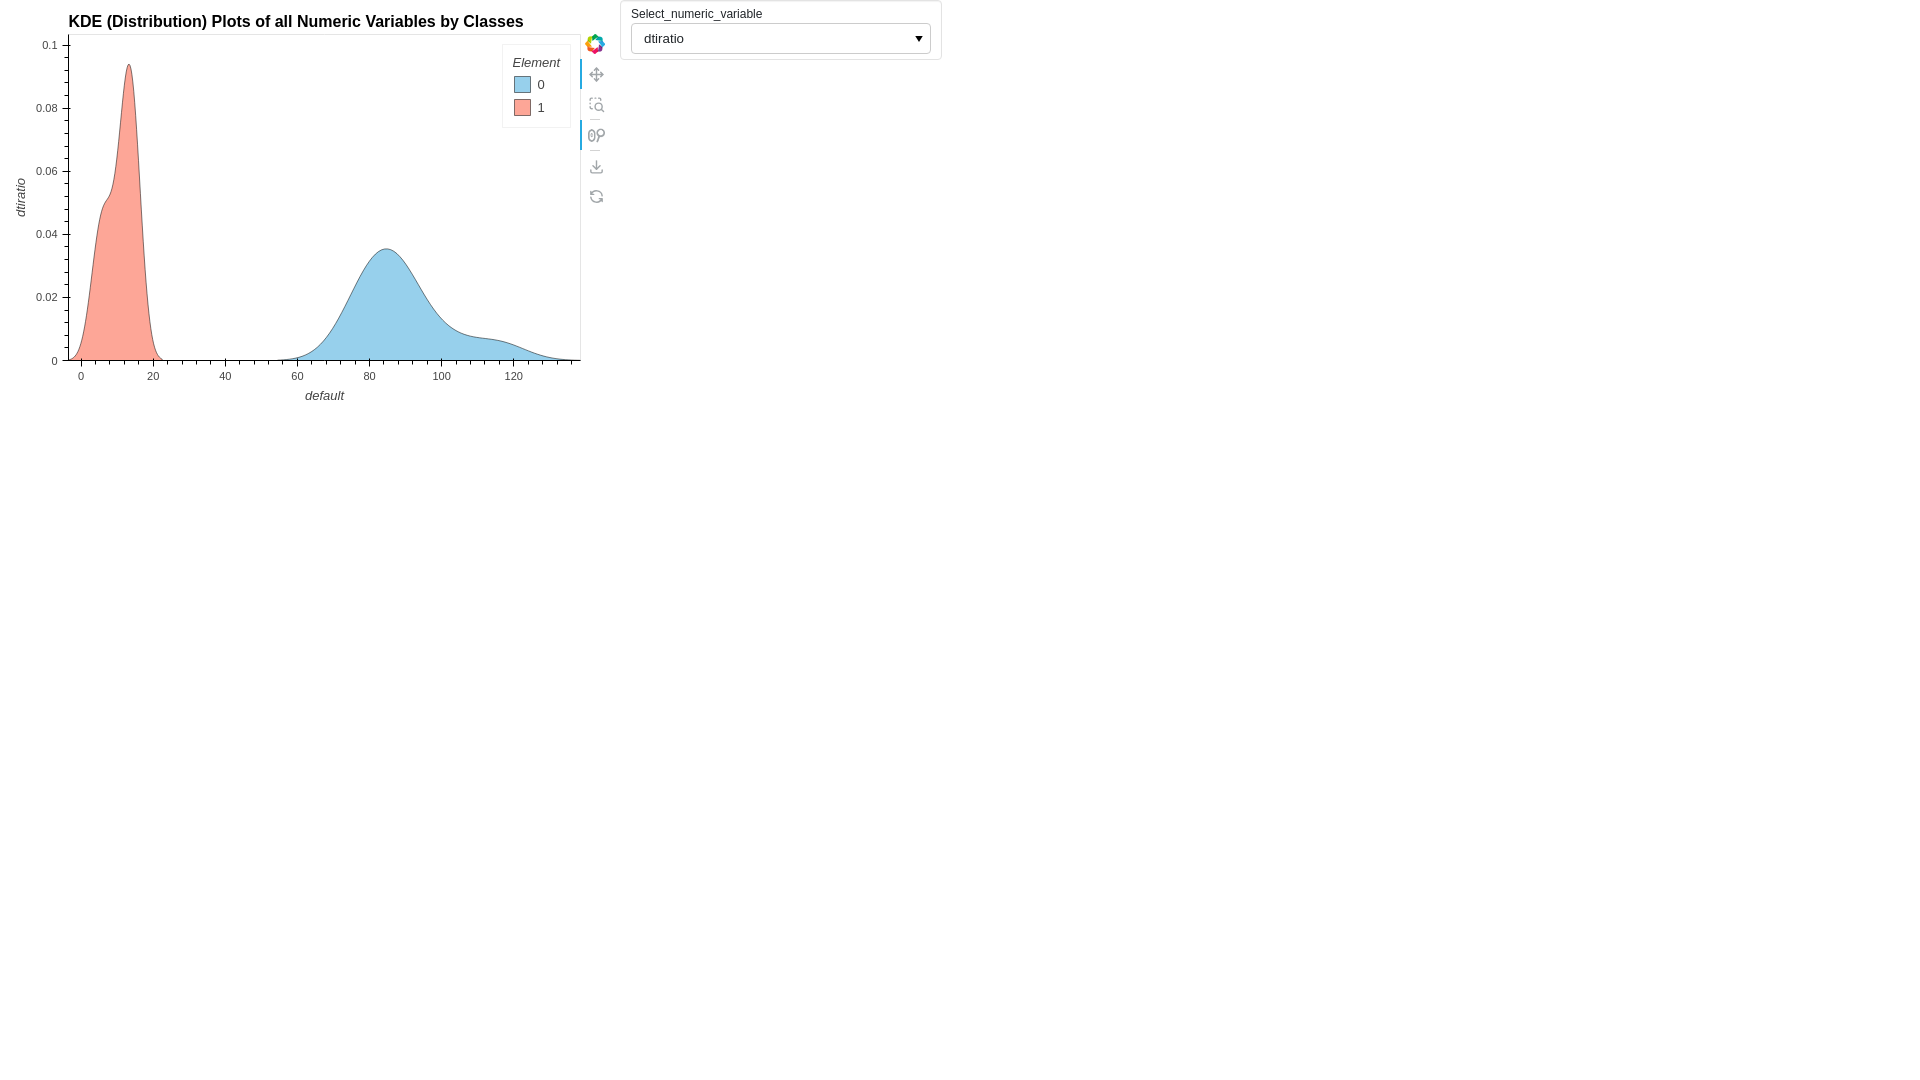

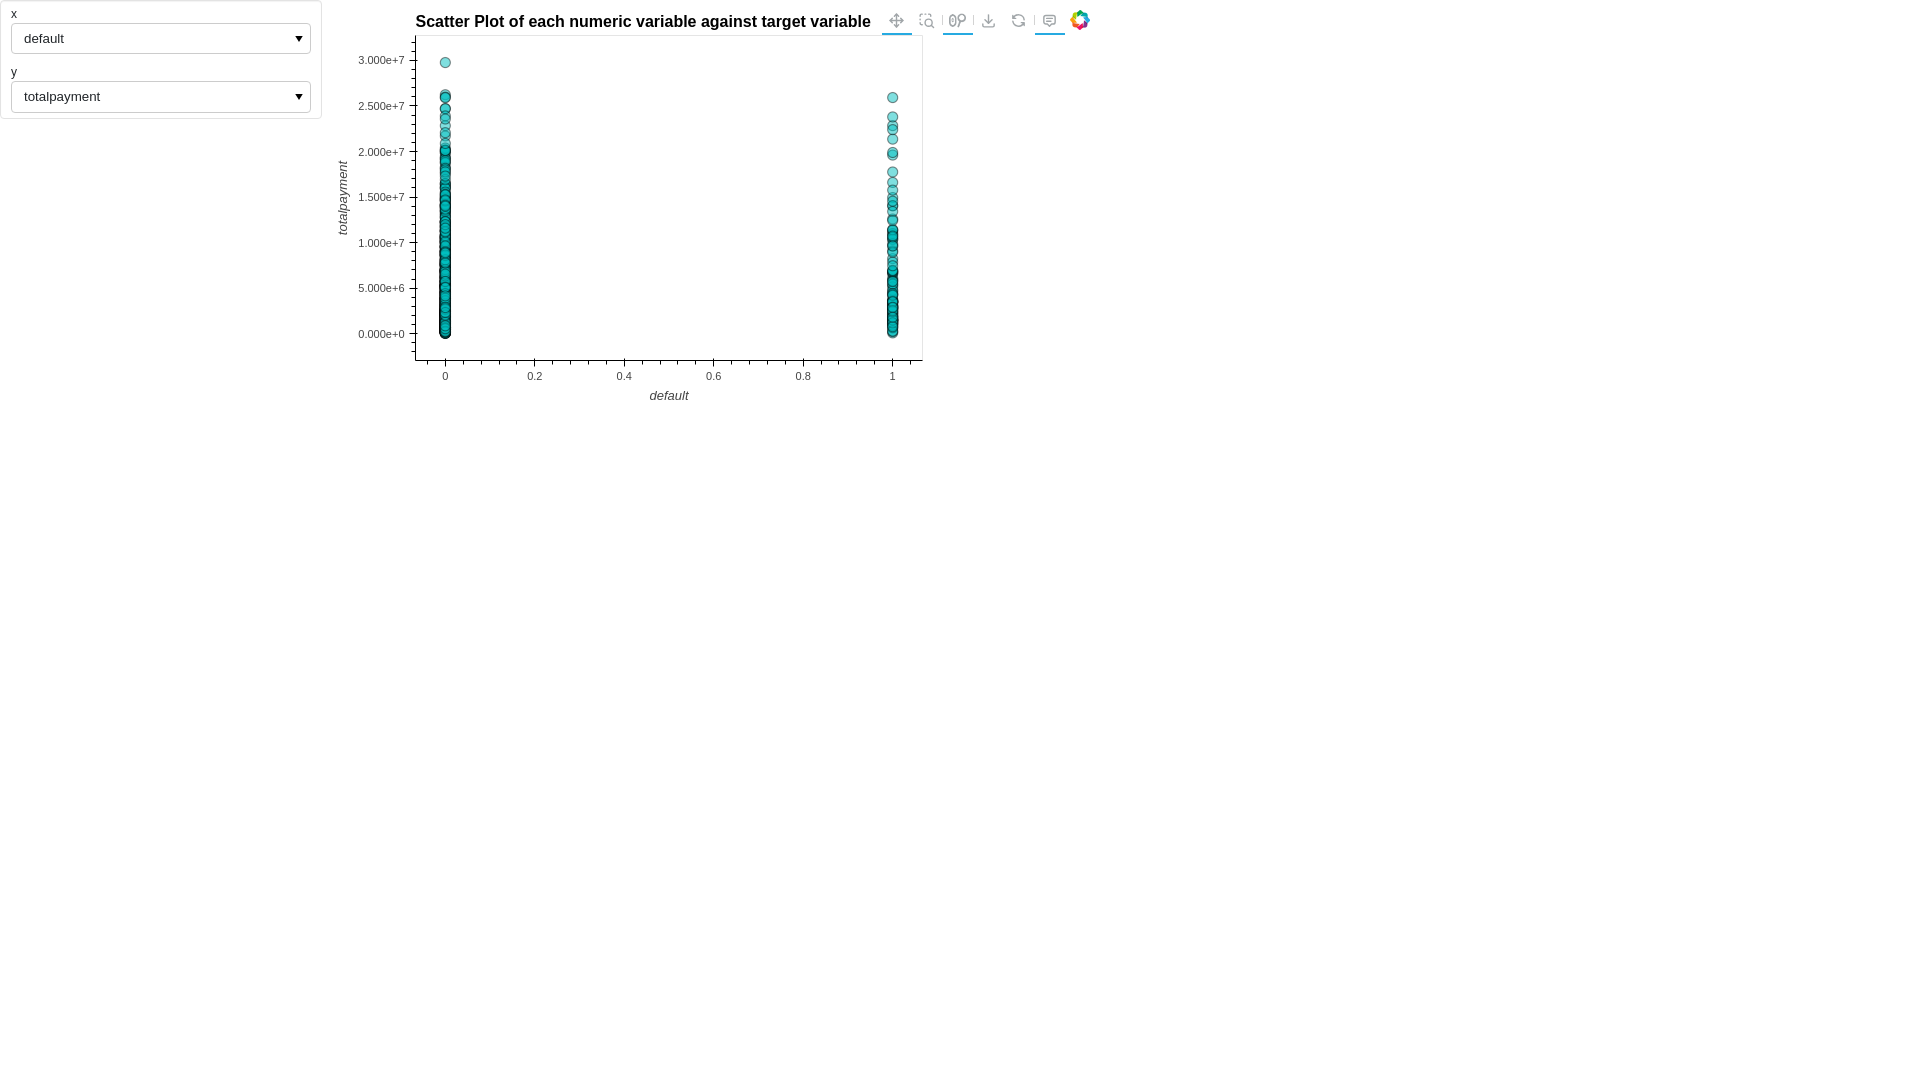

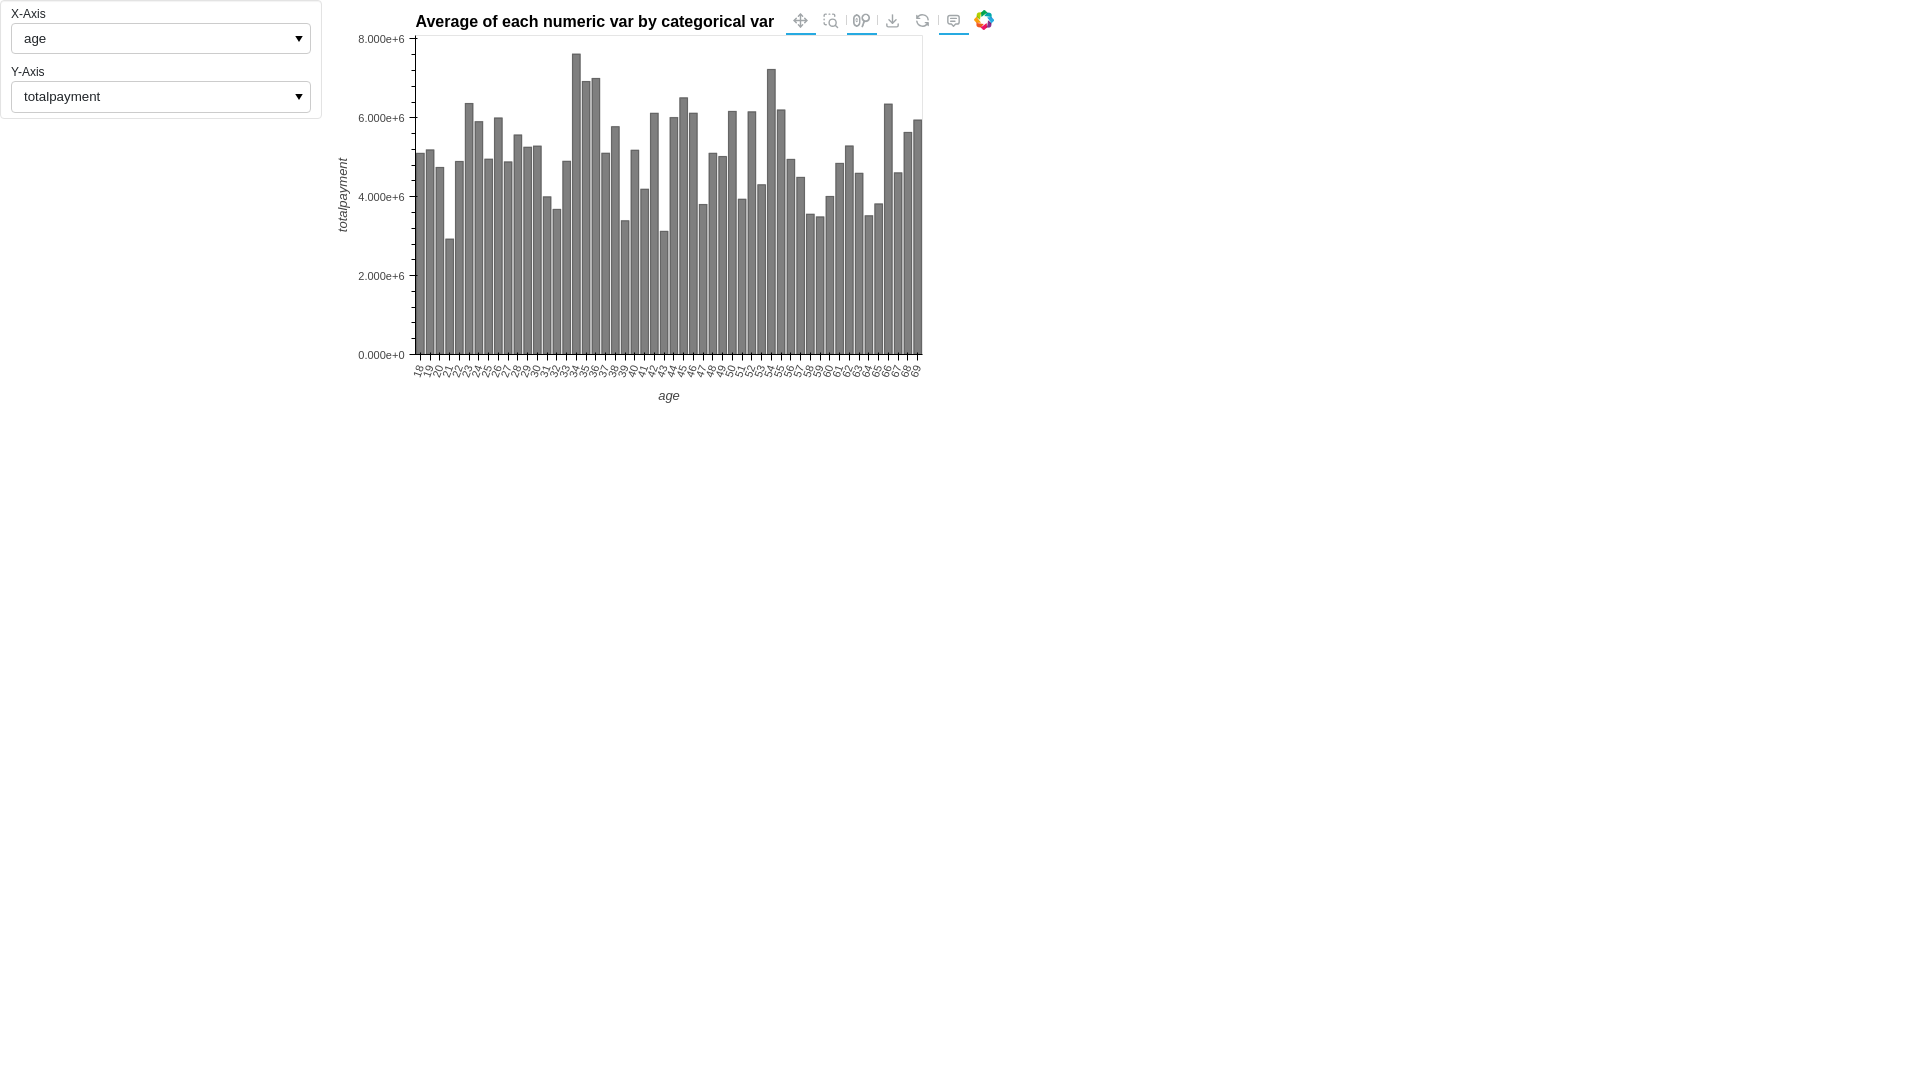

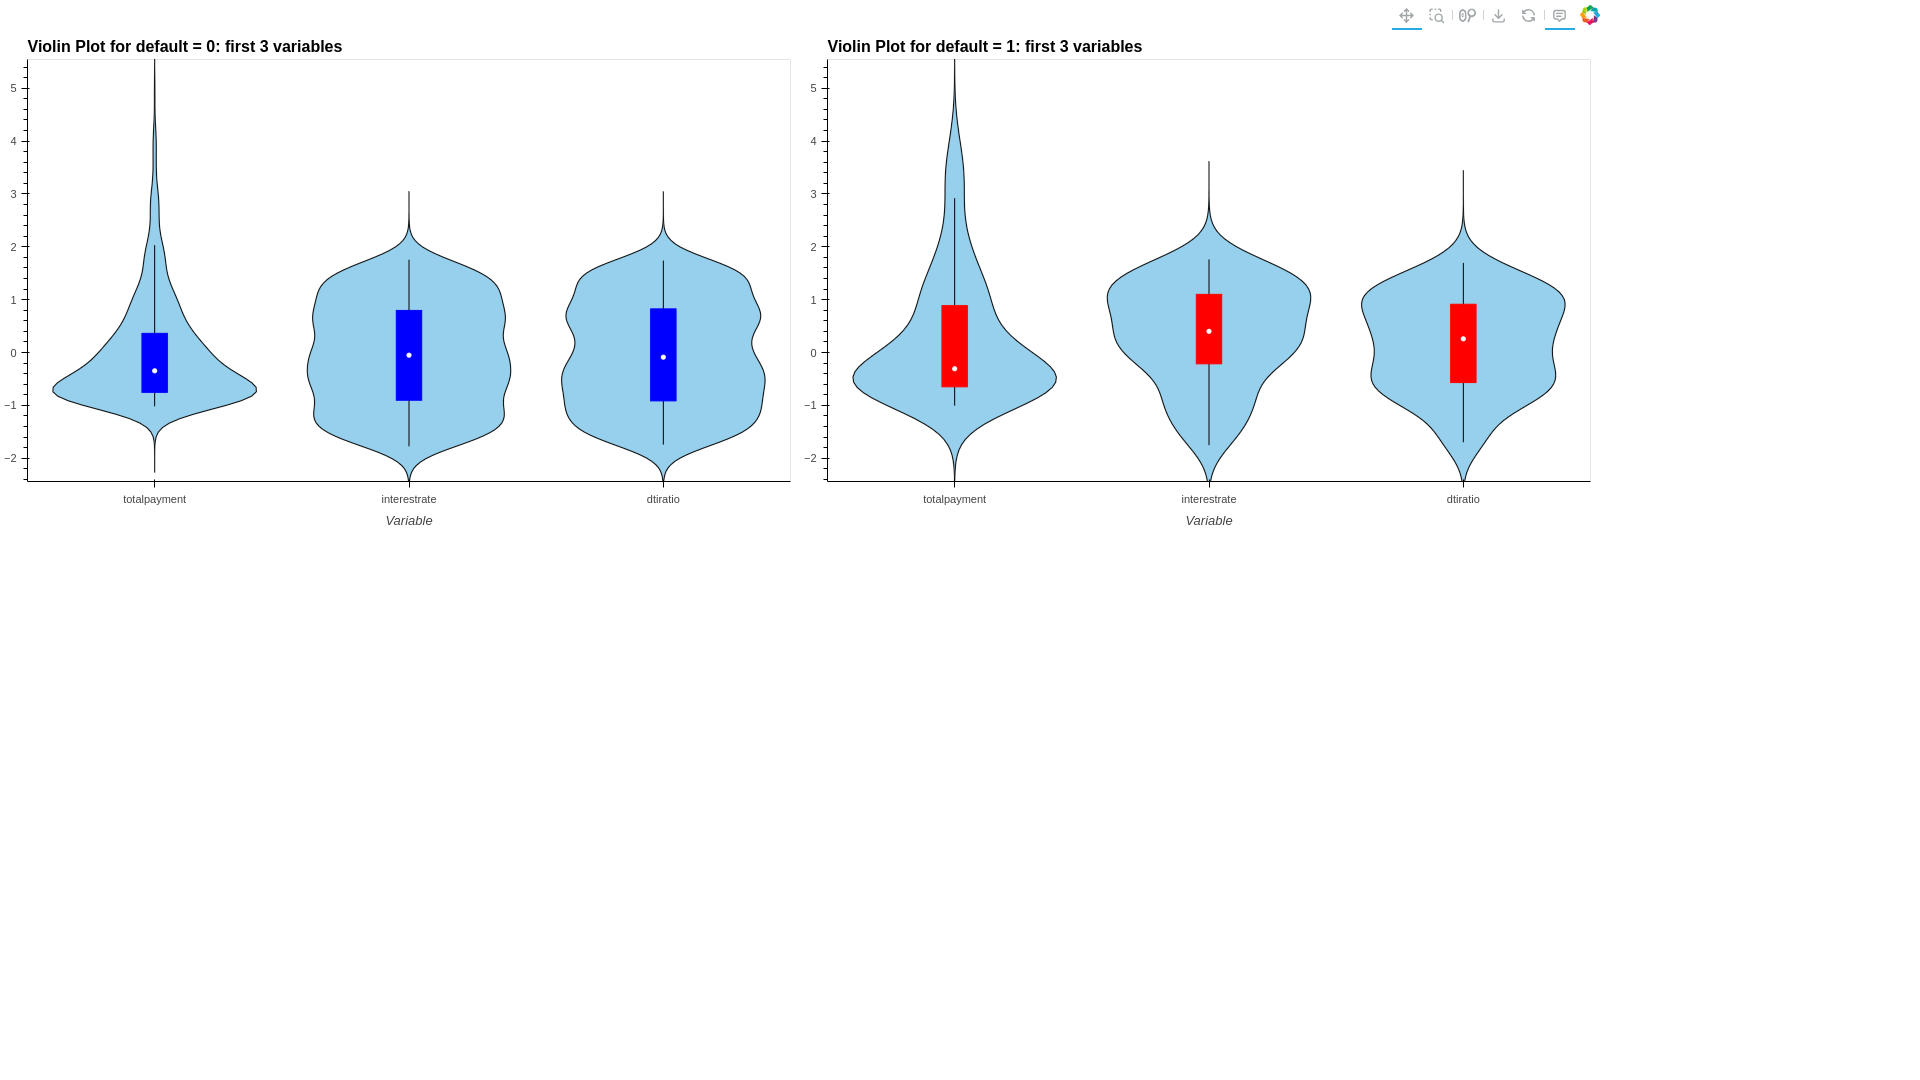

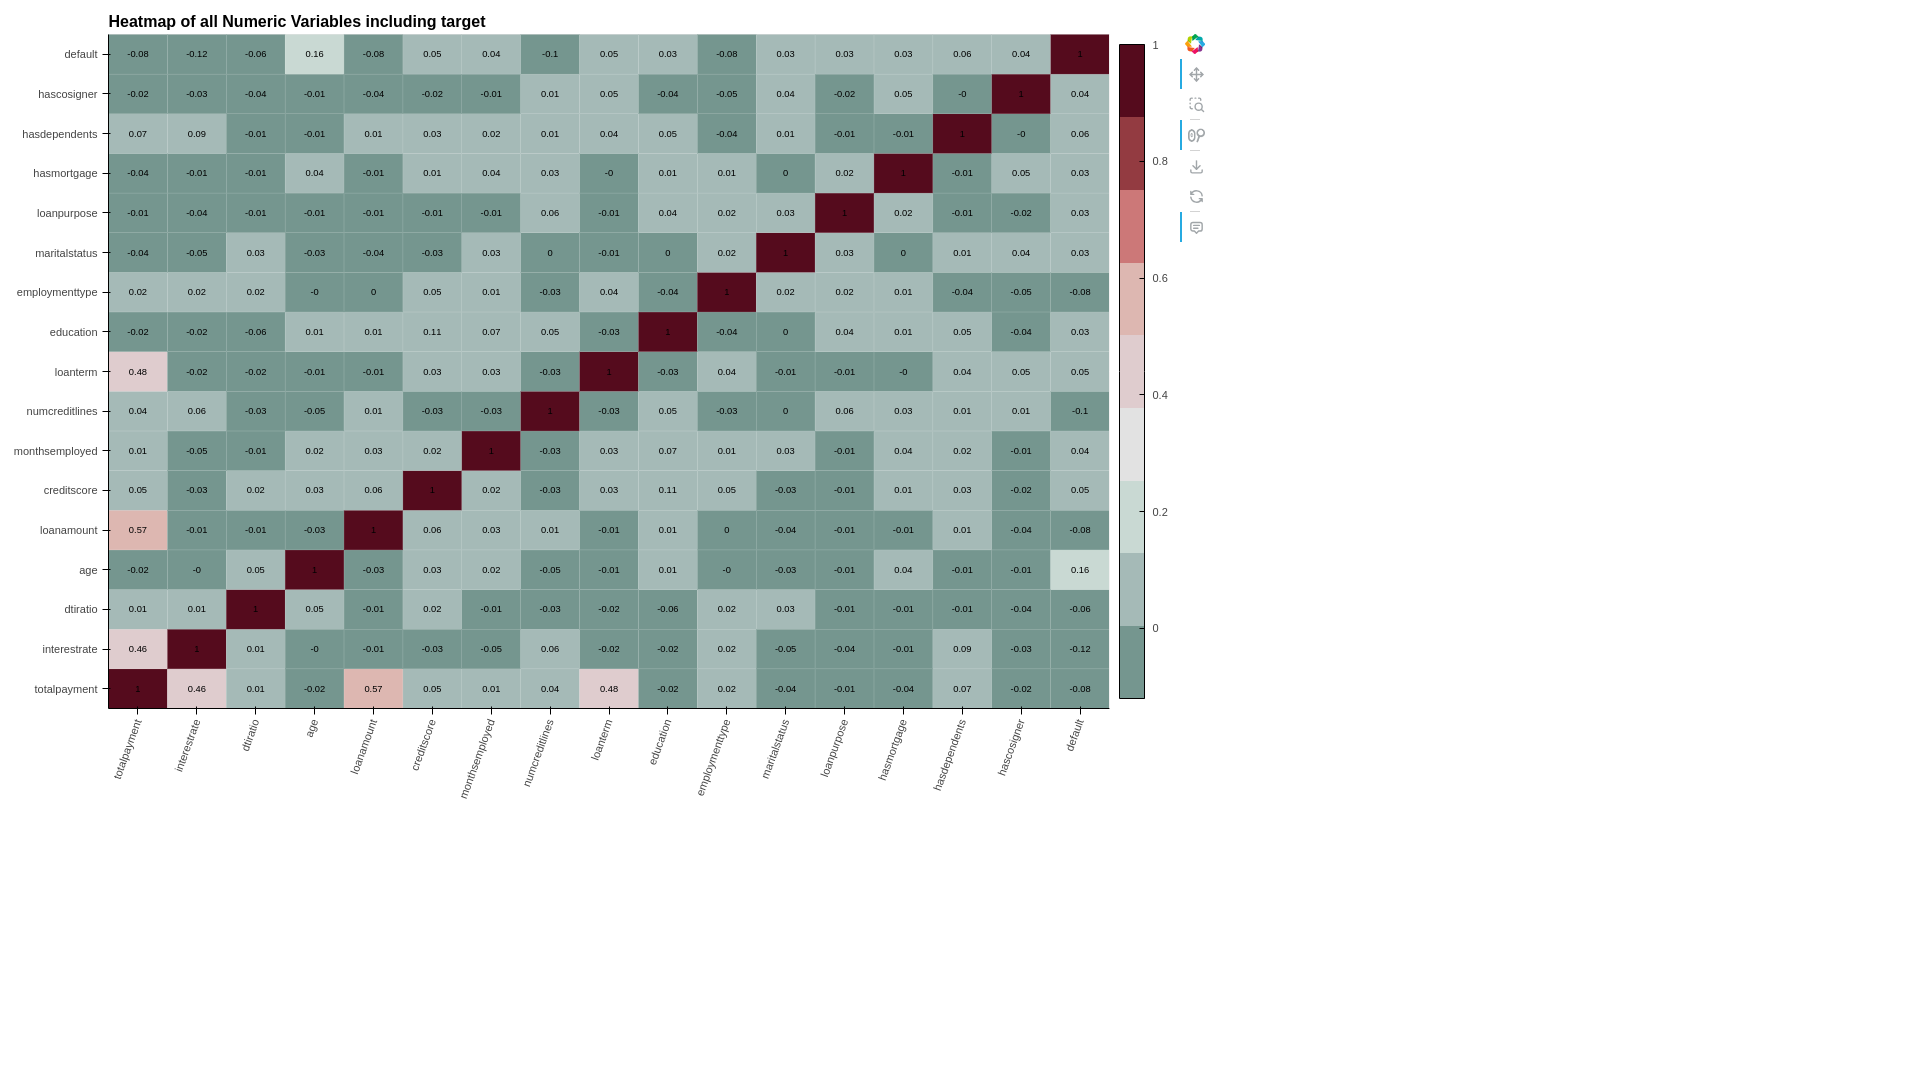

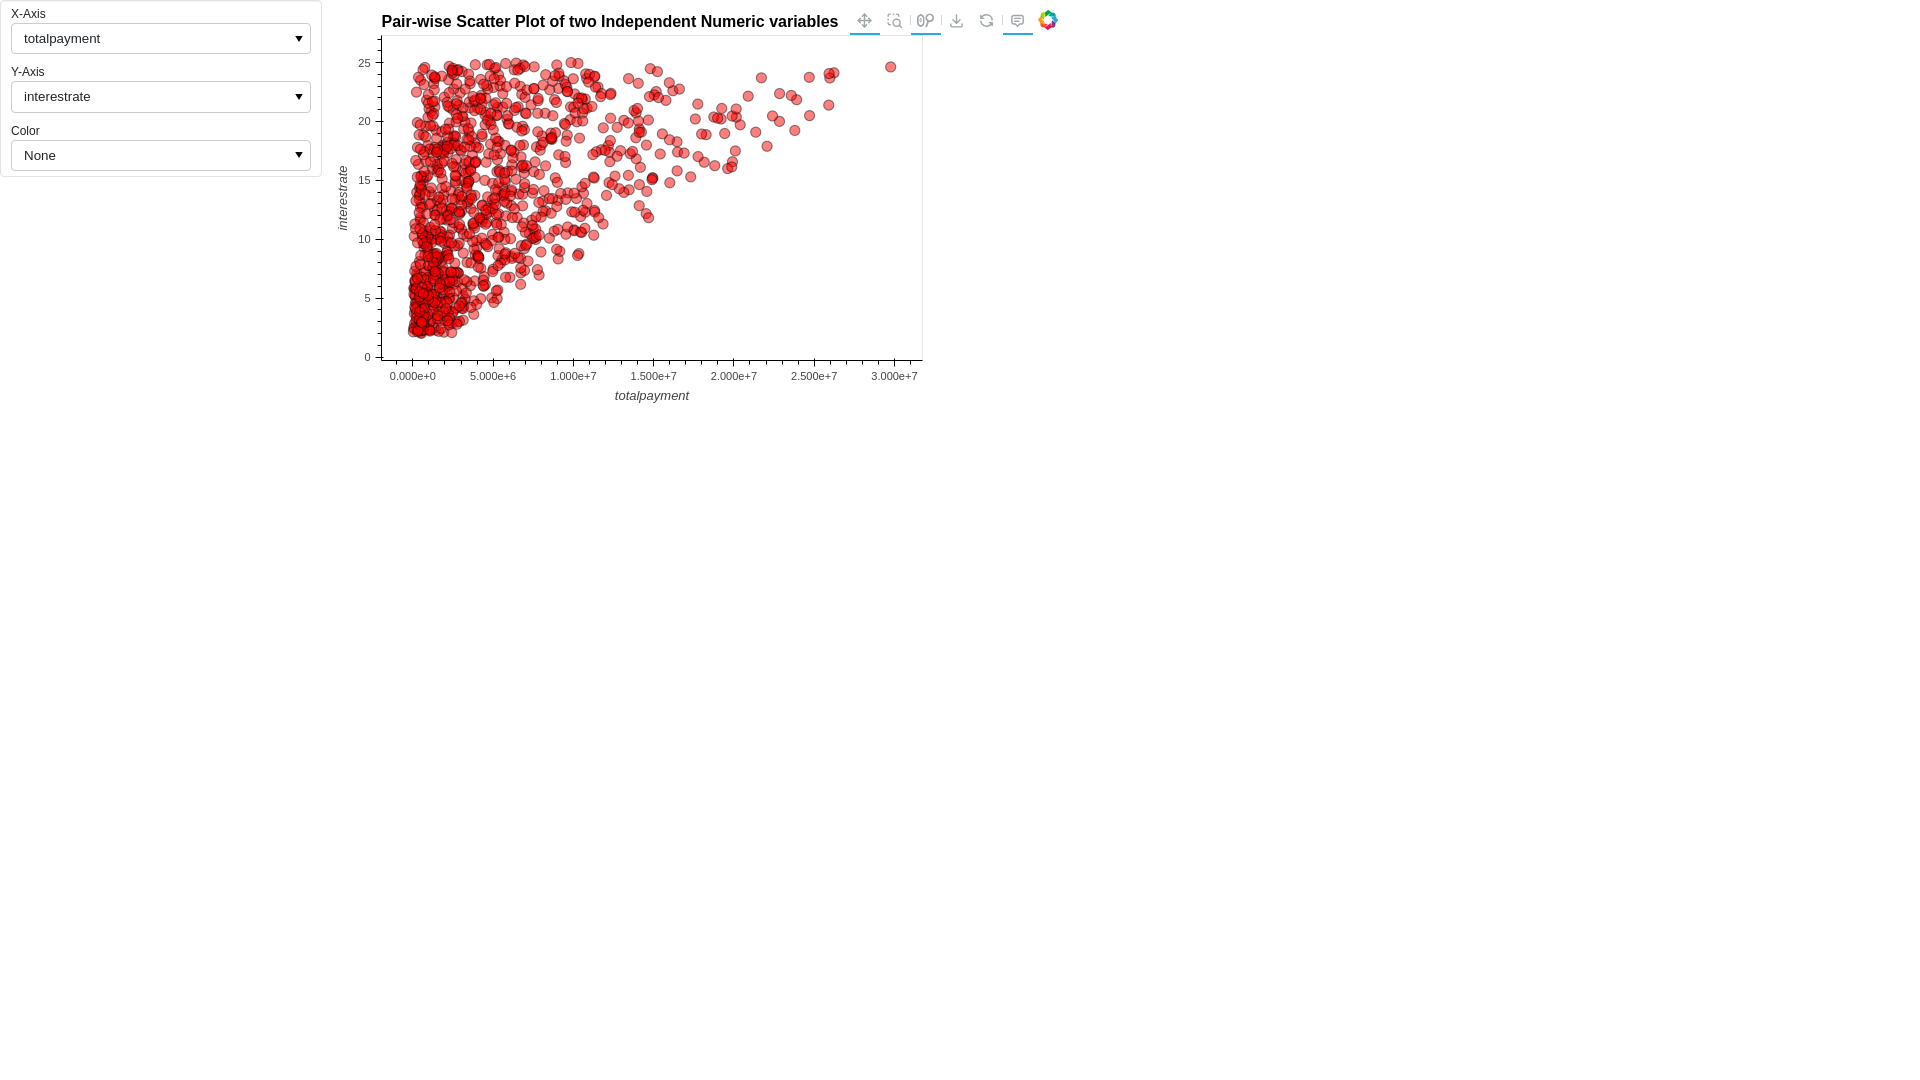

In [ ]:
from IPython.display import Image, display

# Display the saved PNG files
for file in Path(save_plot_path).glob('*.png'):
    display(Image(filename=str(file)))

AutoViz offers good vizualization and narrows down the EDA process.

##Conclusions Drawn from the EDA.

**Key Insights from Exploratory Data Analysis (EDA):**

### Numerical Columns:
1. **Outliers and Distribution:**
   - No outliers were detected in any of the numerical columns. The data exhibited a uniform distribution without missing values.

2. **Correlation with 'default' Column:**
   - Columns such as 'age', 'income', 'creditscore', and 'monthsemployed' displayed weak negative correlations with the 'default' column (ranging from -0.167783 to -0.034166). These factors alone do not strongly predict default status.
   - Conversely, 'loanamount', 'numcreditlines', 'interestrate', 'loanterm', and 'dtiratio' showed weak positive correlations with the 'default' column (ranging from 0.000545 to 0.131273), with 'interestrate' exhibiting the strongest correlation.

3. **Total Payment Column:**
   - Introduced the 'totalpayment' column, calculated as \( \text{loanamount} \times \text{interestrate} \times \frac{\text{loanterm}}{12} \). This column had several outliers. Due to its sensitivity, outliers were retained. It showed a positive correlation of 0.11937100546422792 with the 'default' column.

4. **Multivariate Analysis:**
   - There were no correlations observed initially among the columns in the dataframe, except for their correlations with the 'default' column. However, there is notable correlation observed between the newly introduced 'totalpayment' column and its constituent columns—'loanamount' at 0.56, 'interestrate' at 0.50, and 'loanterm' at 0.48.

### Categorical Columns:
1. **Education:** Higher education levels correlate with lower default rates. High school graduates exhibit higher default frequencies.

2. **Employment Type:** Unemployed individuals are more likely to default. Full-time employees have a lower default rate compared to self-employed individuals.

3. **Marital Status:** Married individuals show a lower default risk compared to unmarried individuals.

4. **Has Mortgage:** Applicants with mortgages demonstrate a lower default probability.

5. **Has Dependents:** Individuals with dependents are less likely to default.

6. **Loan Purpose:** Business loans are associated with a higher default likelihood, whereas loans for home purchase or maintenance (mortgage) have the lowest default rates.

7. **Has Cosigner:** Applicants with cosigners present a lower default risk.

8. **Statistical Significance:** Categorical columns exhibited small p-values, indicating significant associations with the 'default' column.

9. **Chi-Square Analysis:** The large Chi-square statistics further support substantial differences in frequencies, suggesting associations beyond chance.


10. **Default column analysis:**
In the dataset, there are 29,653 defaulters, comprising 11.6% of the total, and 225,694 non-defaulters, accounting for 88.4% of the total. This distribution could introduce bias in the trained model, potentially favoring the identification of non-defaulters over defaulters.

**Overall Analysis on Categorical Columns:**
From the dataset, it is evident that individuals who are full-time employed, highly educated, and have responsibilities such as dependents and mortgages are less likely to default on loans.

Below is a sample of how the dataframe looks like after applying label-encoding.

In [ ]:
df.head(5)

,age,income,loanamount,totalpayment,creditscore,monthsemployed,numcreditlines,interestrate,loanterm,dtiratio,education,employmenttype,maritalstatus,hasmortgage,hasdependents,loanpurpose,hascosigner,default
0,56,85994,50587,2311320.03,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1,0
1,69,50432,124440,2992782.00,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1,0
2,46,84208,129188,5469819.92,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0,1
3,32,31713,44799,633457.86,743,0,3,7.07,24,0.23,1,0,1,0,0,1,0,0
4,60,20437,9139,237979.56,633,8,4,6.51,48,0.73,0,3,0,0,1,0,0,0


#Data Pre-processing

In this section we will divide the dataset into train, test and validation datasets.